# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [13]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [14]:
# First off we delete columns, that we with dosn't have ML-value
df = df.drop(columns=["WaterworksName"])

In [15]:
# now I would like to explore if any columns should be droped, due high levels of missing data:
# i sort the columns by percentage of null values. 

missing_values_percentage = df.isnull().mean(axis=0) * 100

# Sorting columns by the percentage of missing values in descending order
missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending=False)

missing_values_percentage_sorted

UniformityCoefficient        64.556962
TotalEBCT                    49.367089
SumOfld_layer                49.367089
OverallFilterGrainSizeMin    43.037975
AverageFilterBedVolume       43.037975
OverallFilterGrainSizeMax    43.037975
AverageTotalFilterDepth      41.772152
TankExploitation             37.974684
HLR_BW                       34.177215
Stage1HLR                    26.582278
FilterExploitation           20.253165
MaxTypicalFlow               20.253165
BW%                          16.455696
AverageBackwashVolume        12.658228
UFRV                          8.860759
TankCapacity                  5.063291
Footprint                     5.063291
AverageFilterArea             5.063291
AverageTypicalRunVolume       2.531646
TotalFilters                  0.000000
PrimaryTrigger                0.000000
OxygenFactor                  0.000000
AerationType                  0.000000
GravityPressureMixed          0.000000
Stages                        0.000000
AbstractedVolume         

disregarted these

* UniformityCoefficient        64.556962
* TotalEBCT                    49.367089
* SumOfld_layer                49.367089
* OverallFilterGrainSizeMin    43.037975
* AverageFilterBedVolume       43.037975
* OverallFilterGrainSizeMax    43.037975
* AverageTotalFilterDepth      41.772152
* TankExploitation             37.974684
* HLR_BW                       34.177215
* Stage1HLR                    26.582278

due to to much missing data

In [16]:
# Based on the review of missing values, I selected a threshhold of 22%. Columns with a higher percentage of missing data will be deleted from the df. 

# The threshold value could de up for disuccion, since 22% is a fairly large amount of missing data. If the following analasis show that there for instance 

threshold = 22
columns_to_drop = missing_values_percentage_sorted[missing_values_percentage_sorted > threshold].index
data_cleaned = df.drop(columns=columns_to_drop)

data_cleaned.info(), columns_to_drop


# Storing a coppy of cleaned data so i can use it later
data_cleaned_to_compare = data_cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TotalFilters             79 non-null     int64  
 1   MaxTypicalFlow           63 non-null     float64
 2   AverageFilterArea        75 non-null     float64
 3   AverageTypicalRunVolume  77 non-null     float64
 4   AverageBackwashVolume    69 non-null     float64
 5   PrimaryTrigger           79 non-null     object 
 6   FilterExploitation       63 non-null     float64
 7   AerationType             79 non-null     object 
 8   OxygenFactor             79 non-null     float64
 9   Footprint                75 non-null     float64
 10  UFRV                     72 non-null     float64
 11  BW%                      66 non-null     float64
 12  TankCapacity             75 non-null     float64
 13  GravityPressureMixed     79 non-null     object 
 14  Stages                   79 

In [17]:
display(data_cleaned)

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,143.341204,866.666667,0.414525,27.294778,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,16.714412,40.743665,23.000062,2.576075,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,44.693822,249.217919,2.192086,21.825600,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,194.588021,75.000000,2.166907,12.554300,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,412.300024,167.224093,1.818182,52.220566,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,24.106636,NaN,0.178441,9.176959,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,22.050800,442.097088,1.236822,6.040393,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,209.076387,158.041107,4.446077,22.367525,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,152.513970,93.489396,35.386015,NaN,Gravity,Double,1521895


C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_35500\967014721.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned["Stages"].replace({"Single":1, "Double":2, "Triple":3, "Mixed":4}, inplace=True)
C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_35500\967014721.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option

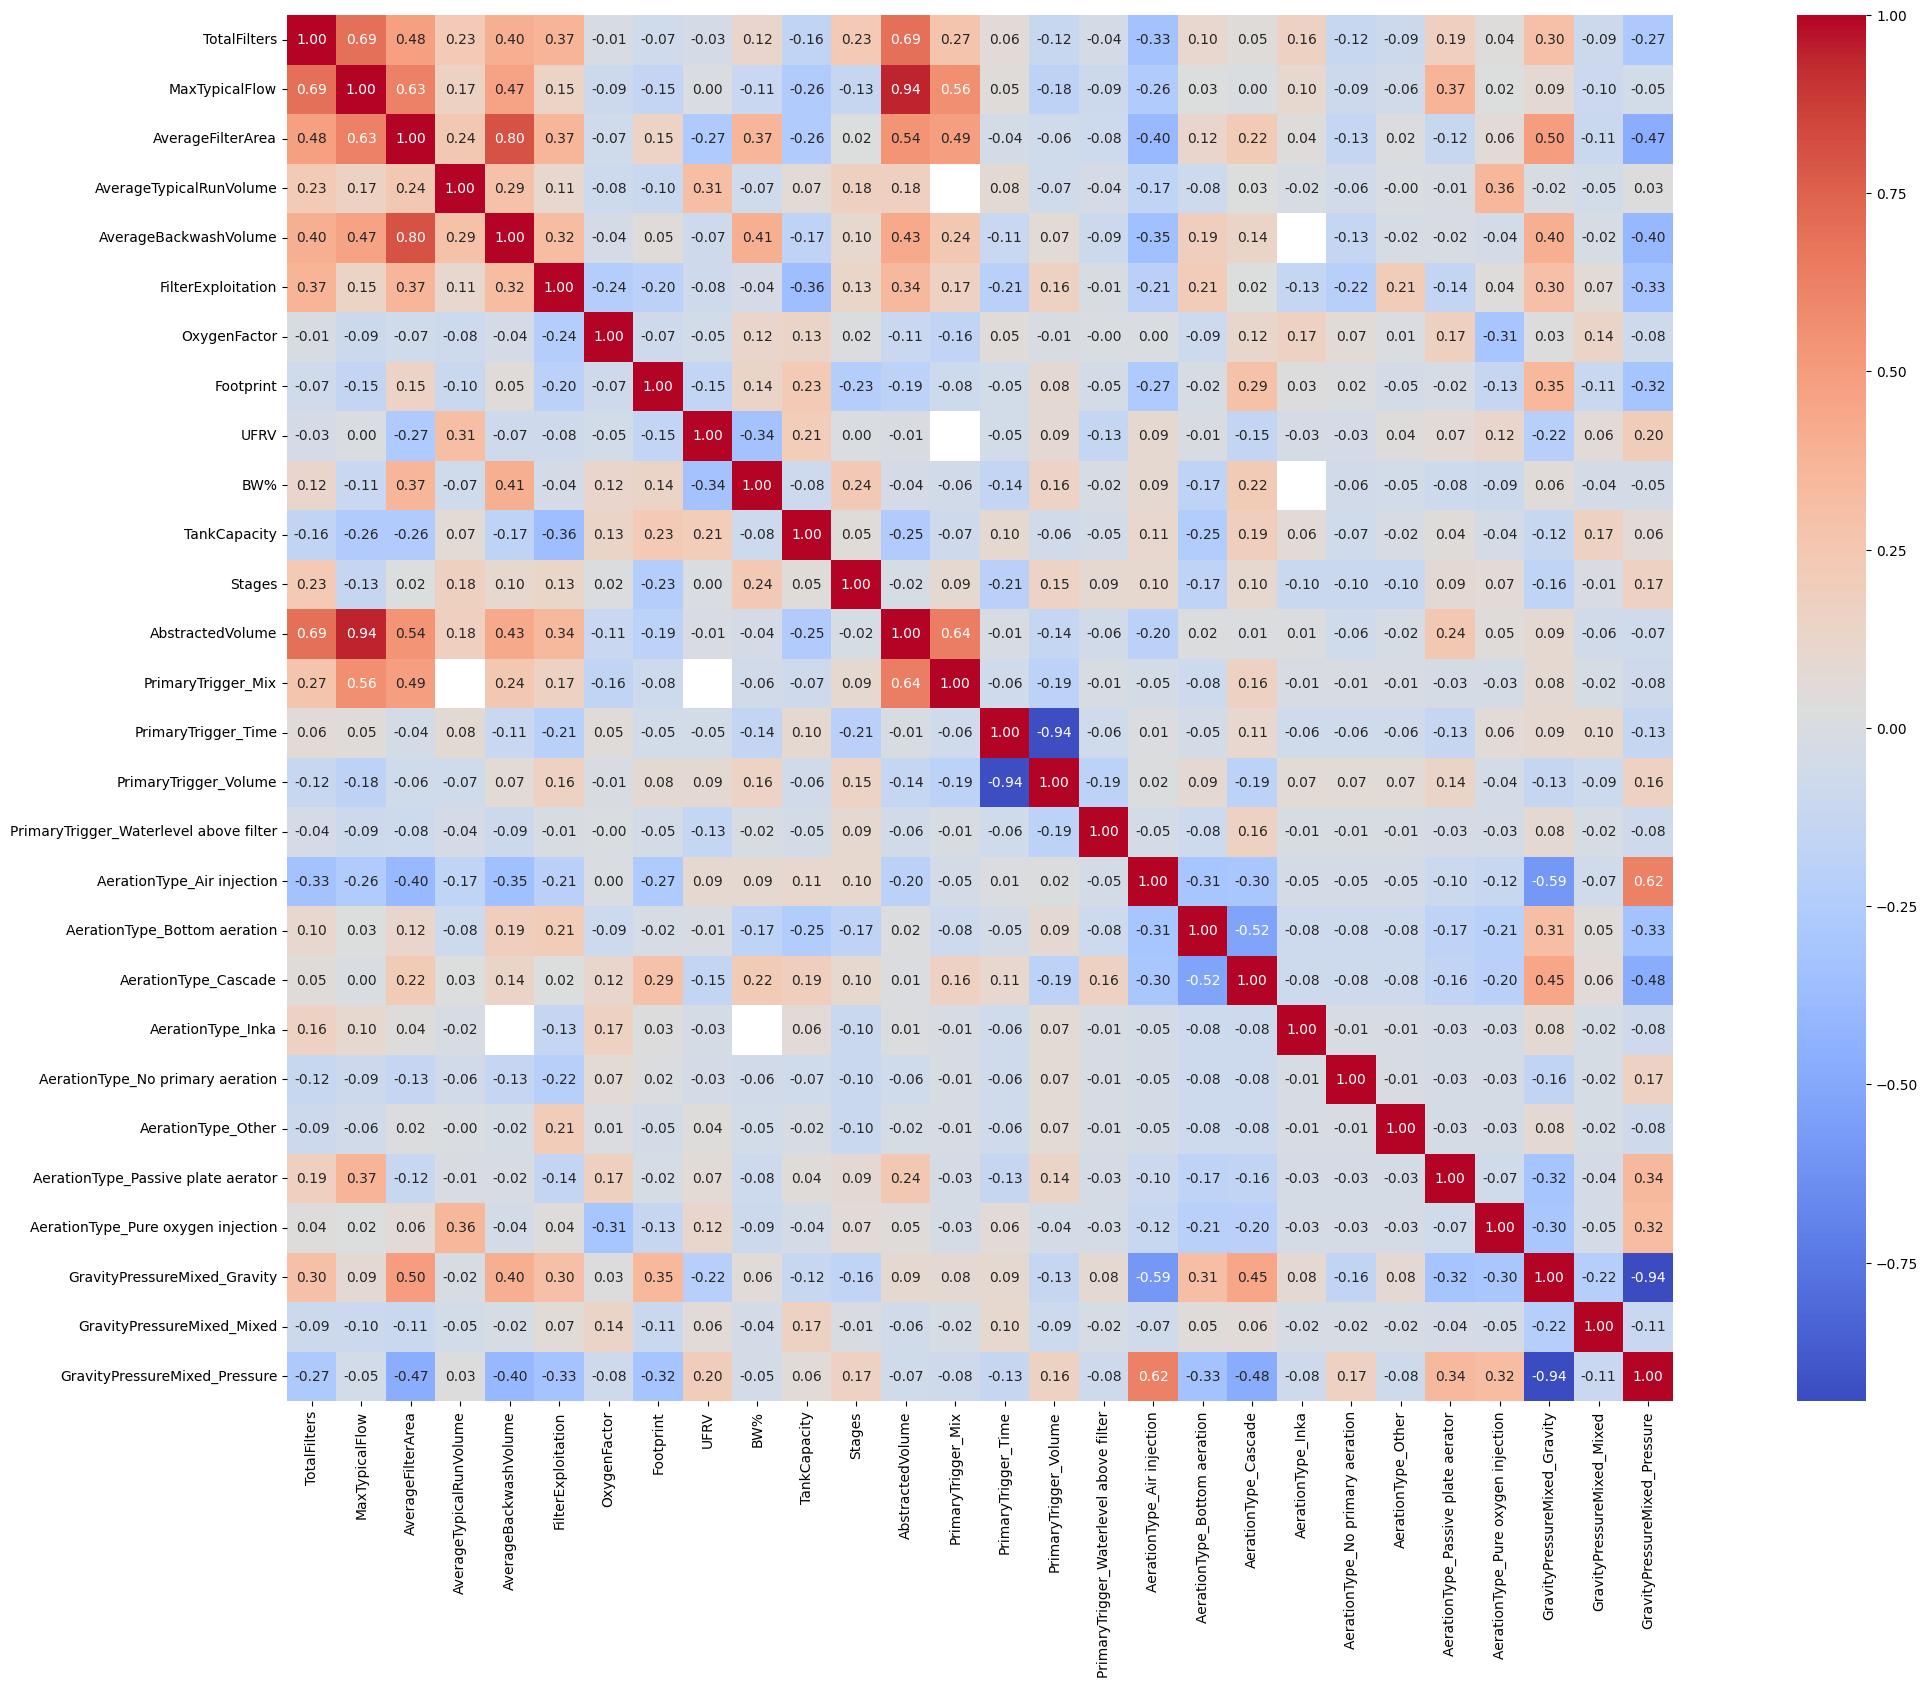

In [18]:
# using one hot encoding for the colums:"PrimaryTrigger", "AerationType","GravityPressureMixed". 
# We find that using ordinal/label encoding is more applicable for the "Stages" column, since "single", "Double", "Triple" most likly represents a numeric value 1-3. 
# But including a domain expert, would be prefered to understang the "meaning" of the values.  
# Now if any columns has a strong correlation, we will decide if there is a option of replacing NaN's between to column

# Check if the columns exist before replacing and encoding
if "Stages" in data_cleaned.columns:
	data_cleaned["Stages"].replace({"Single":1, "Double":2, "Triple":3, "Mixed":4}, inplace=True)

columns_to_encode = ["PrimaryTrigger", "AerationType", "GravityPressureMixed"]
columns_to_encode = [col for col in columns_to_encode if col in data_cleaned.columns]

if columns_to_encode:
	data_cleaned = pd.get_dummies(data_cleaned, columns=columns_to_encode)

data_cleaned_without_na = data_cleaned
correlation_matrix = data_cleaned_without_na.corr()

plt.figure(figsize=(32, 18))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.show()

To get a visual representation of the numerical columns to see which columns' outliers we need to look at.

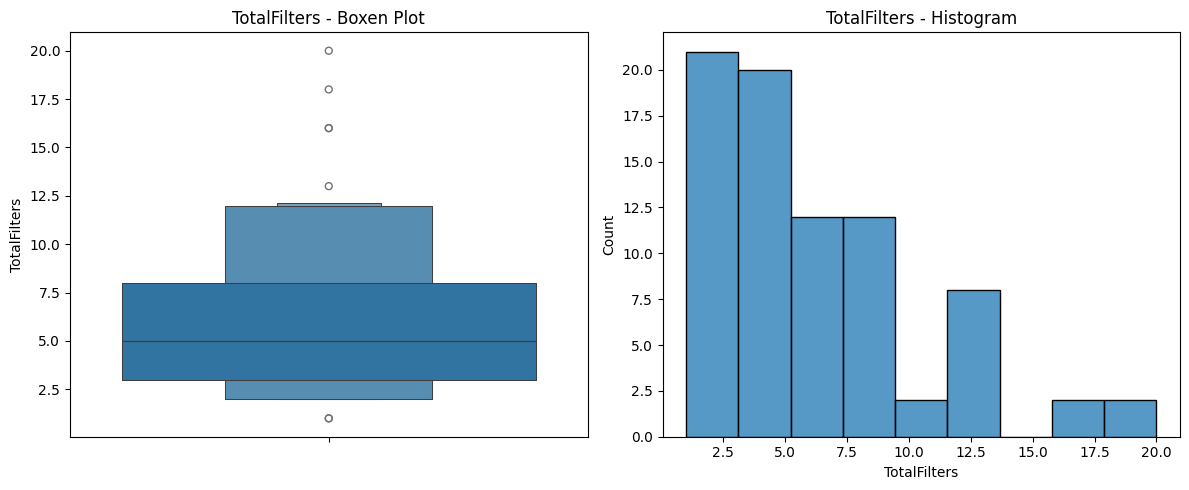

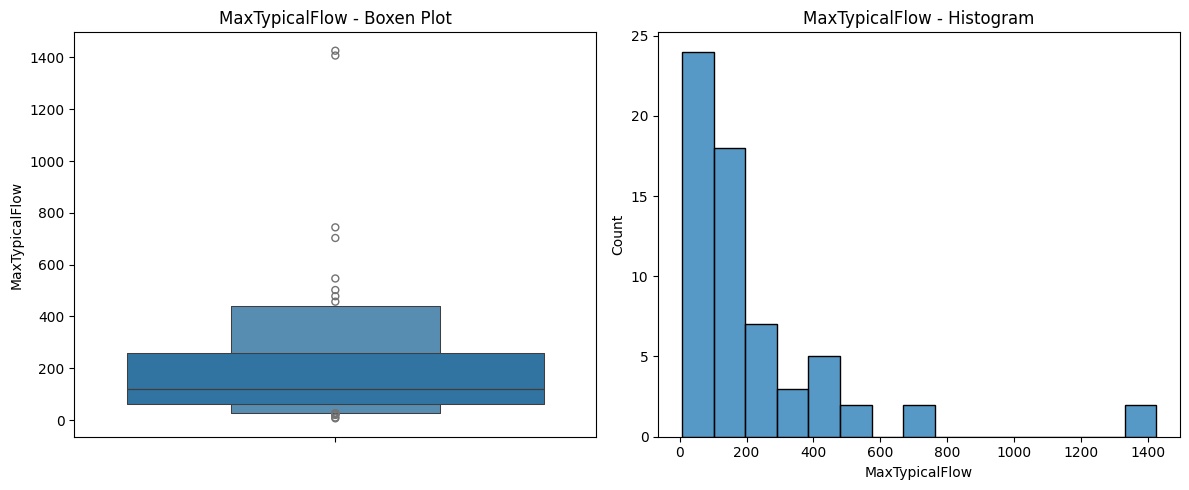

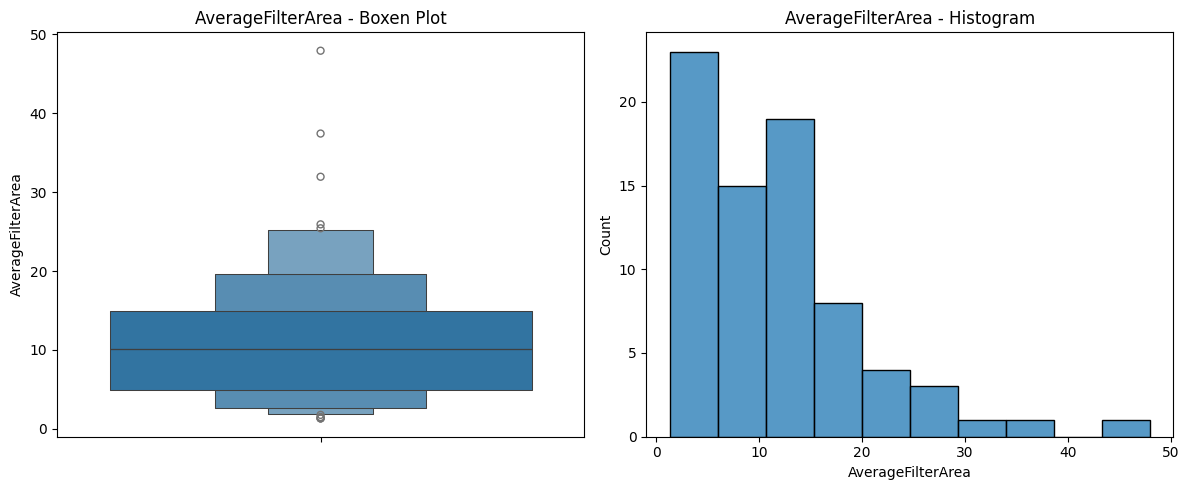

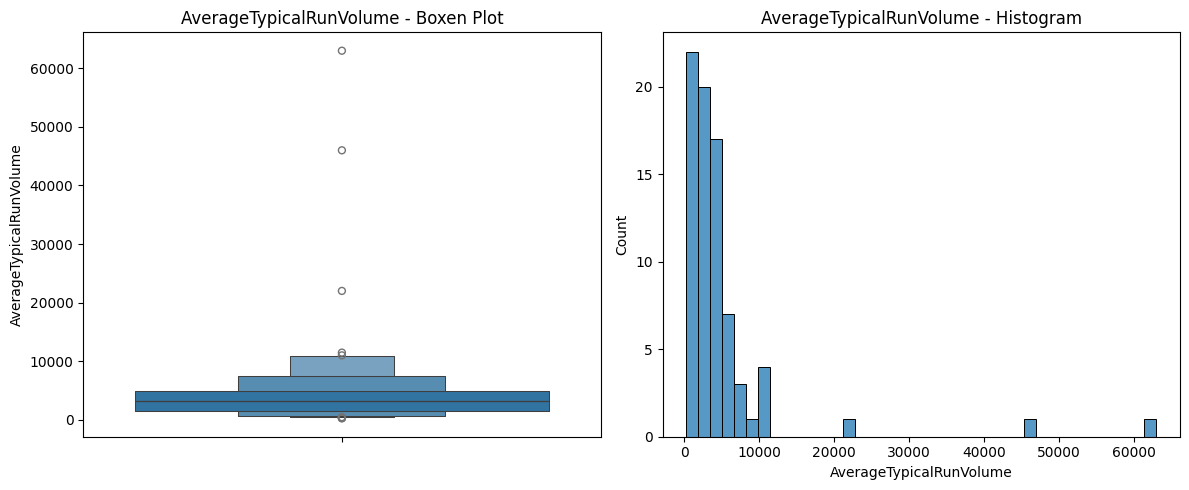

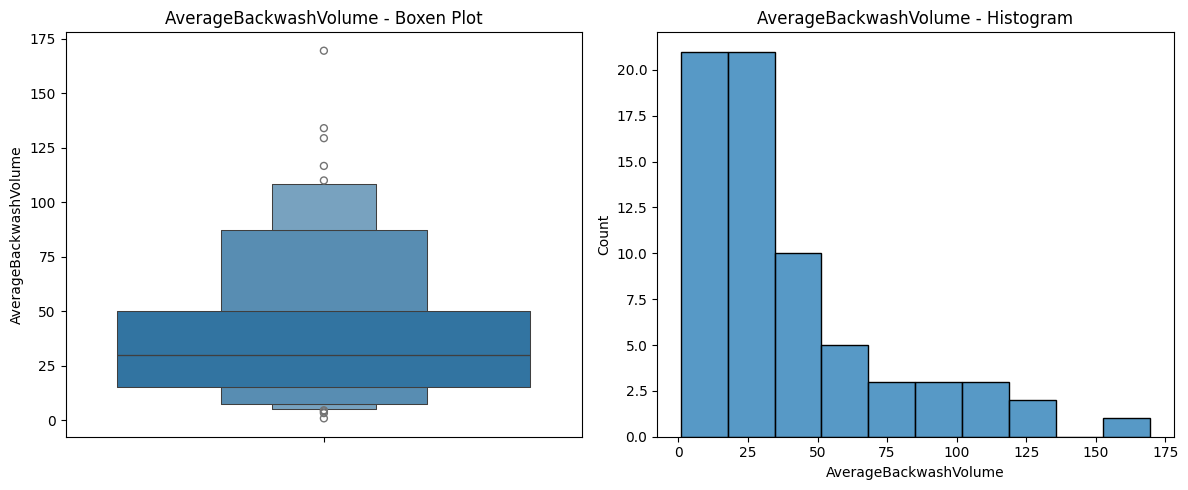

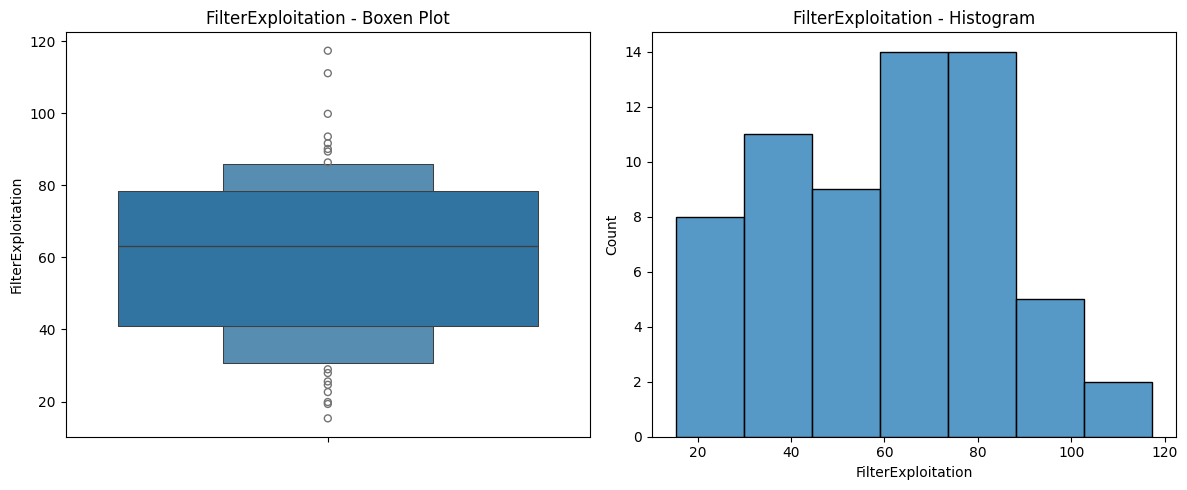

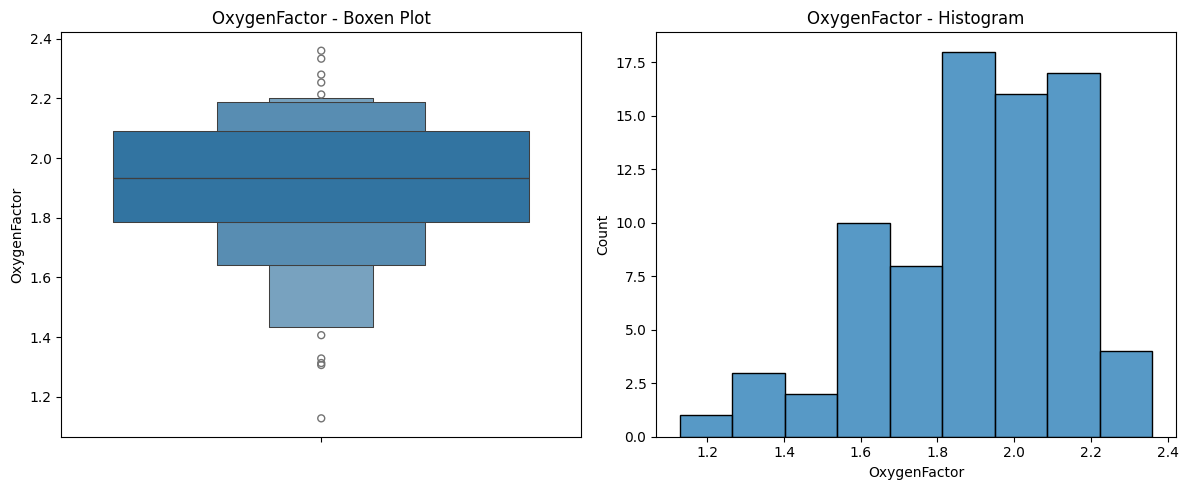

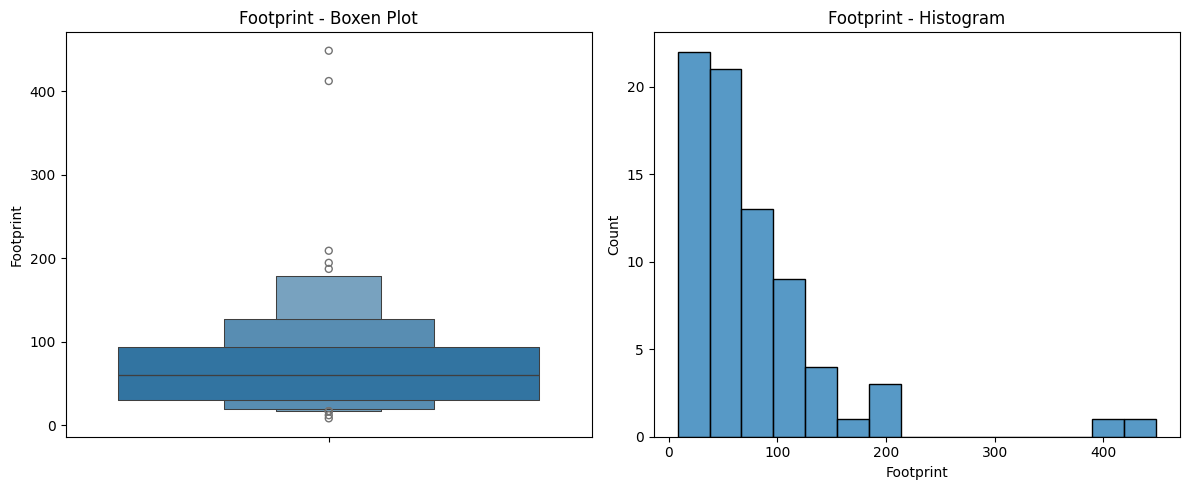

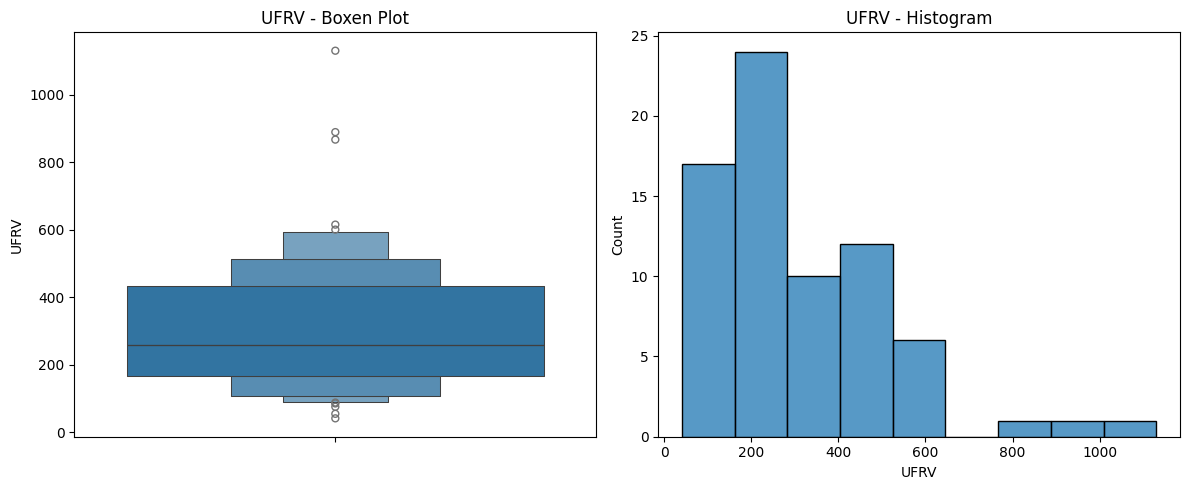

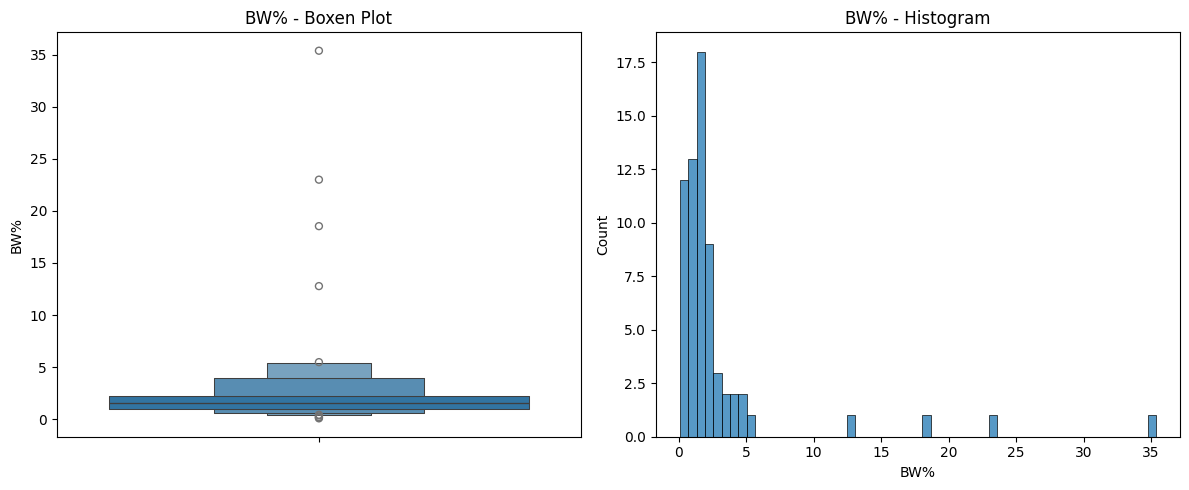

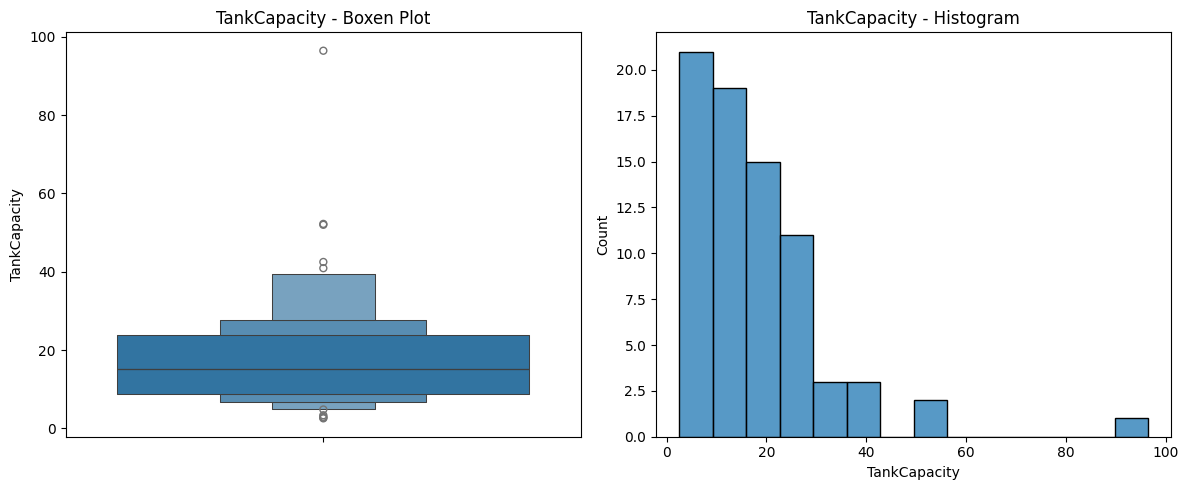

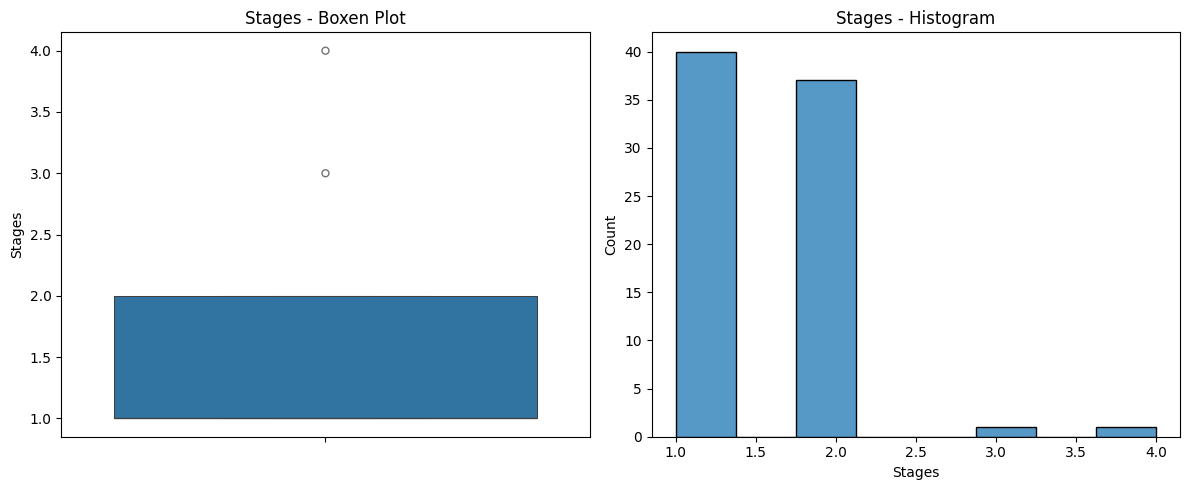

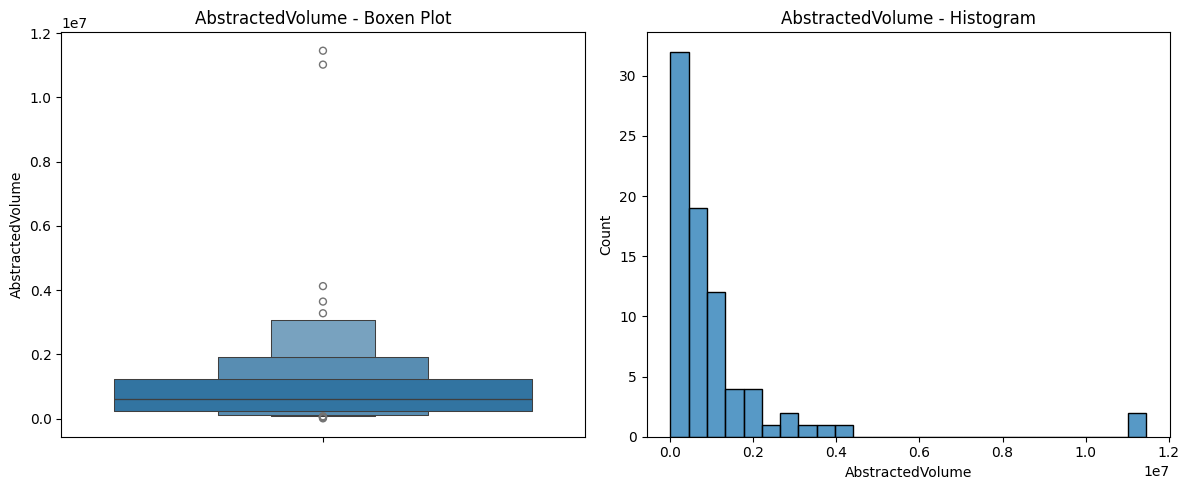

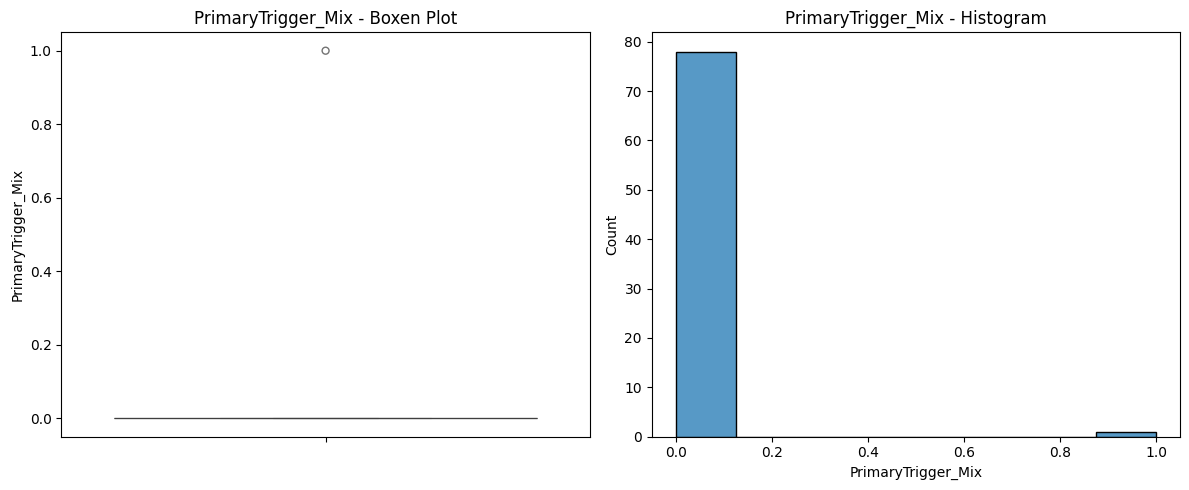

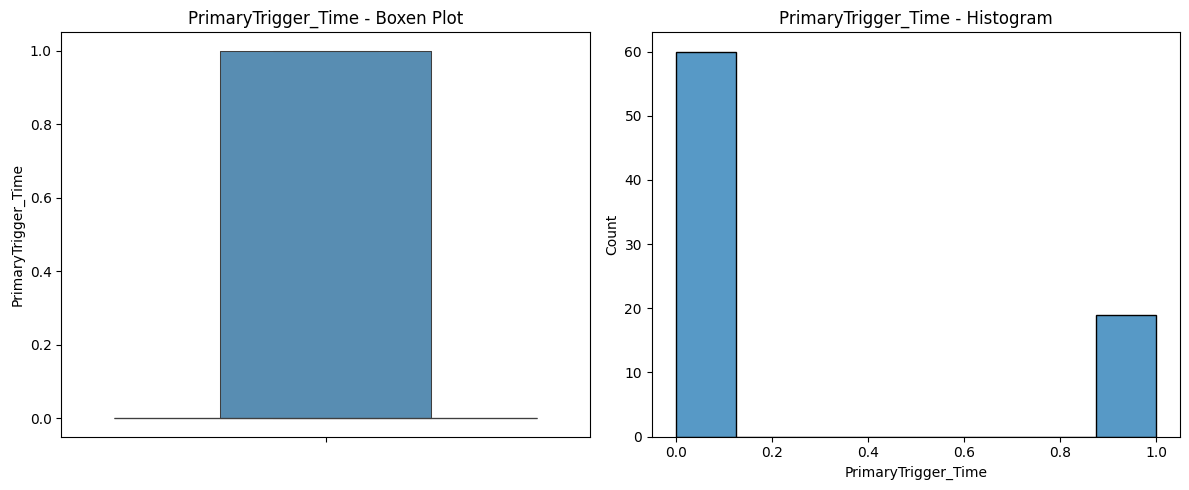

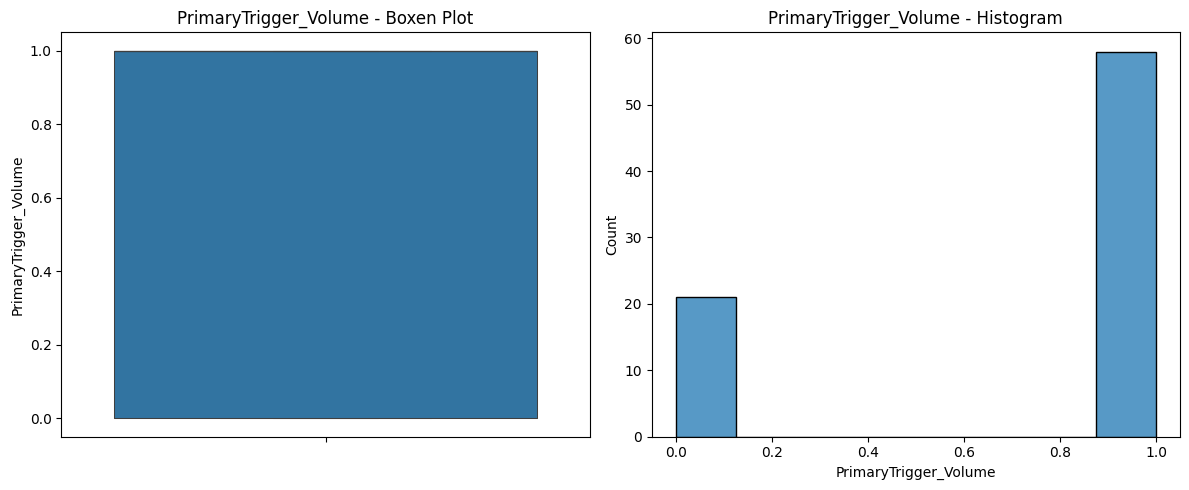

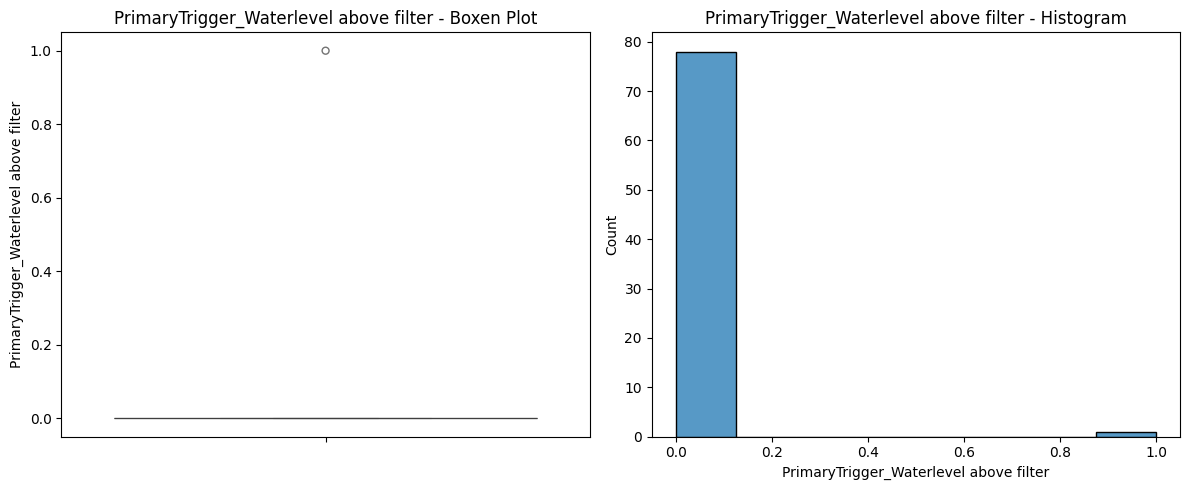

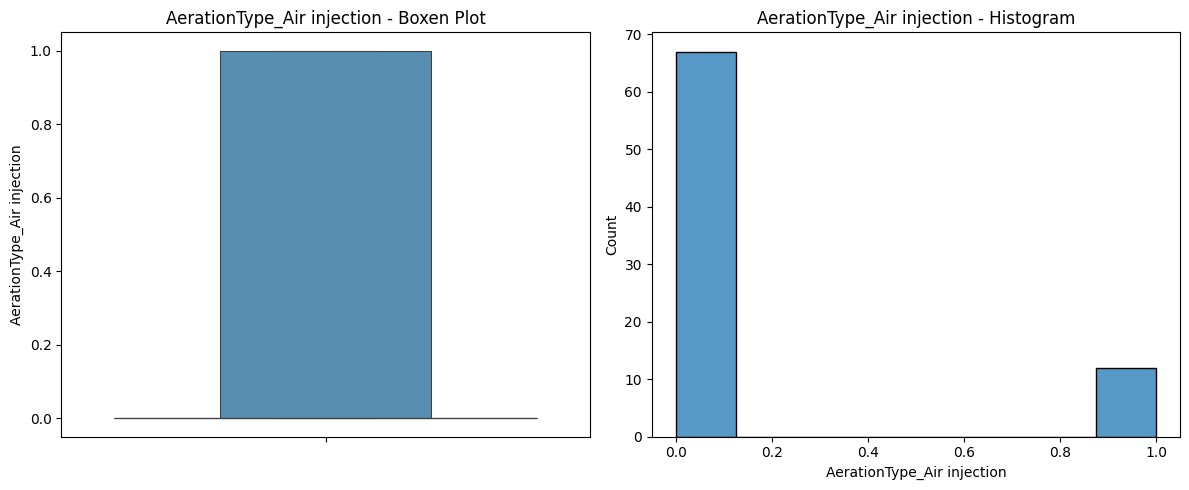

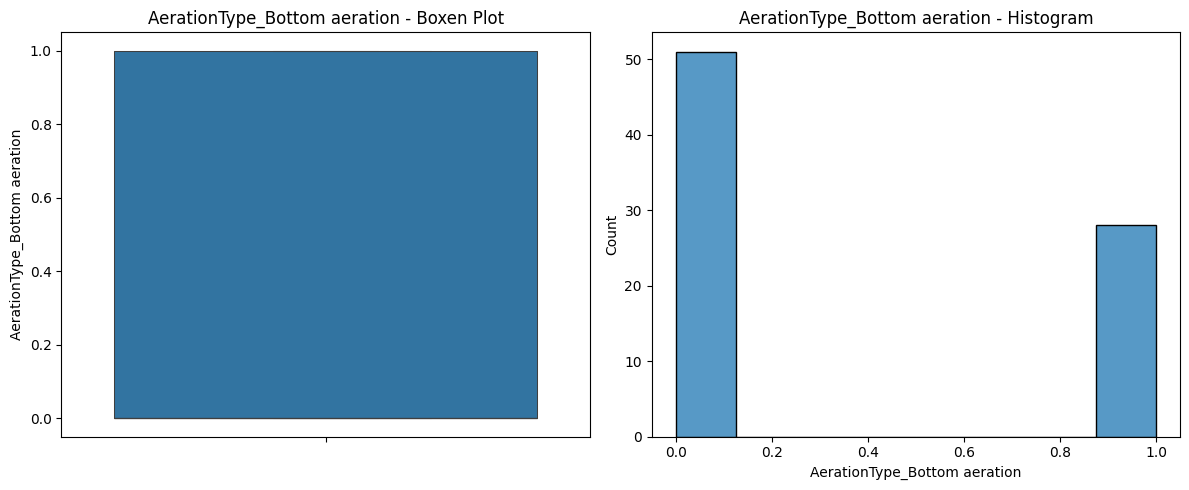

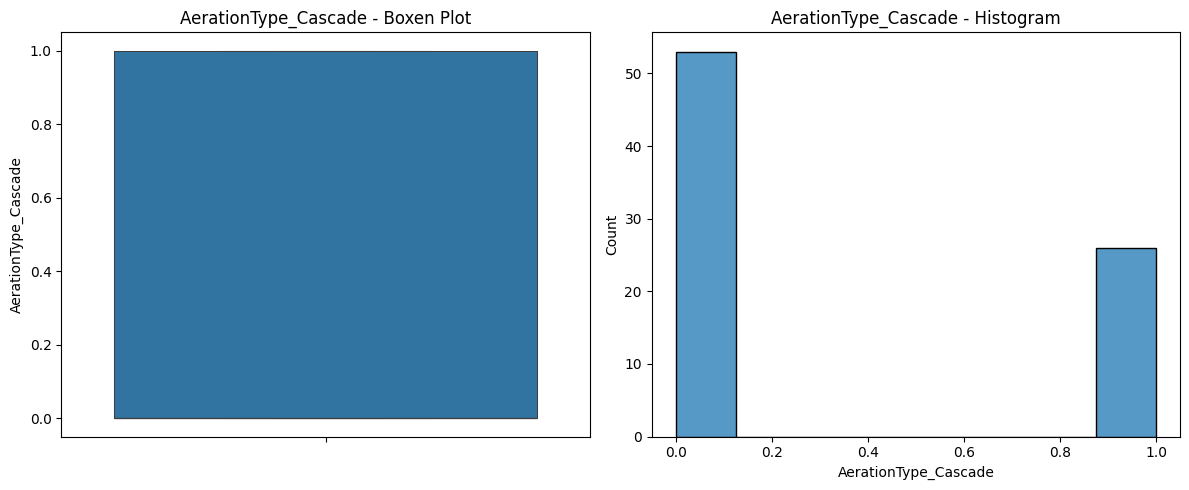

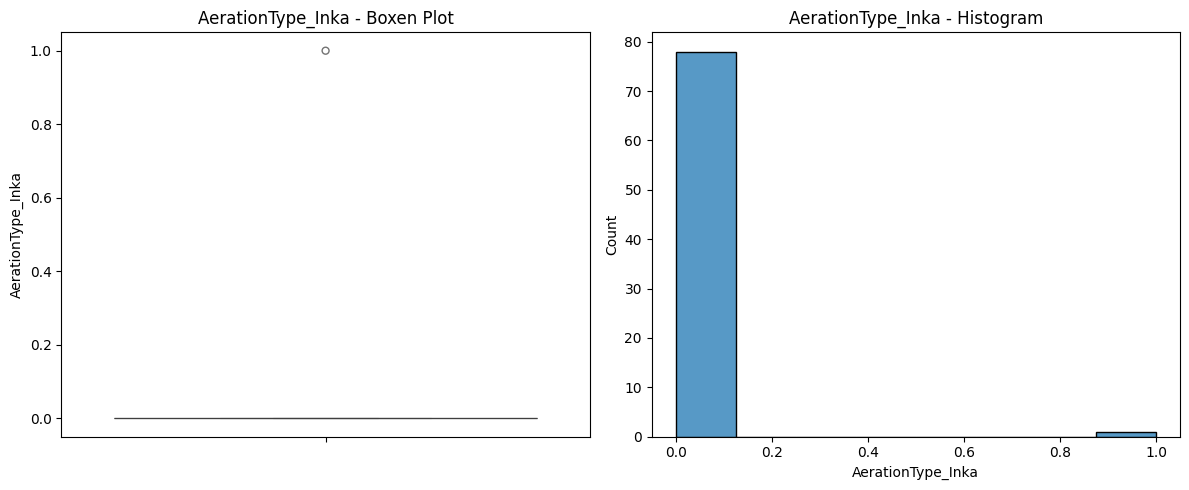

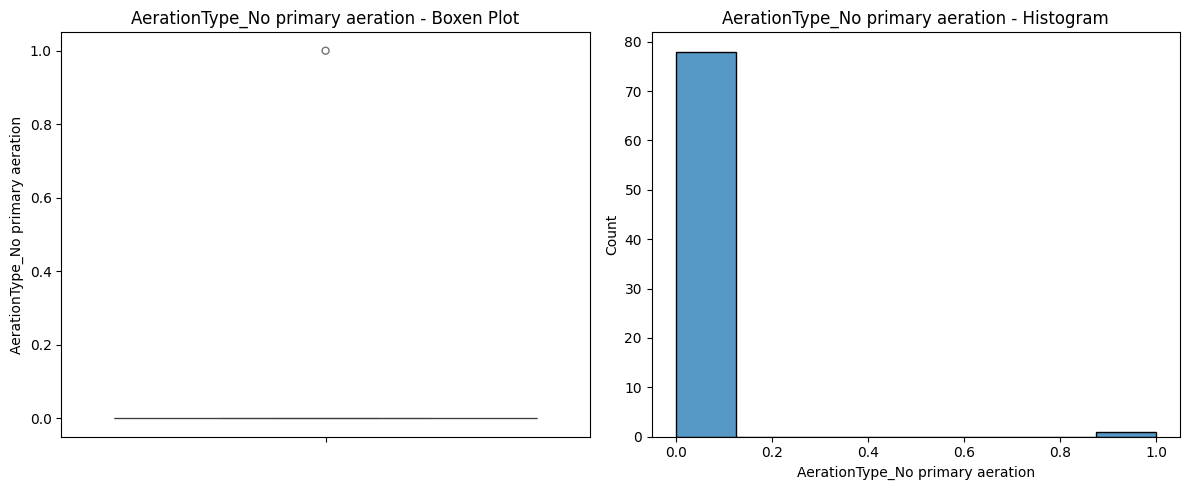

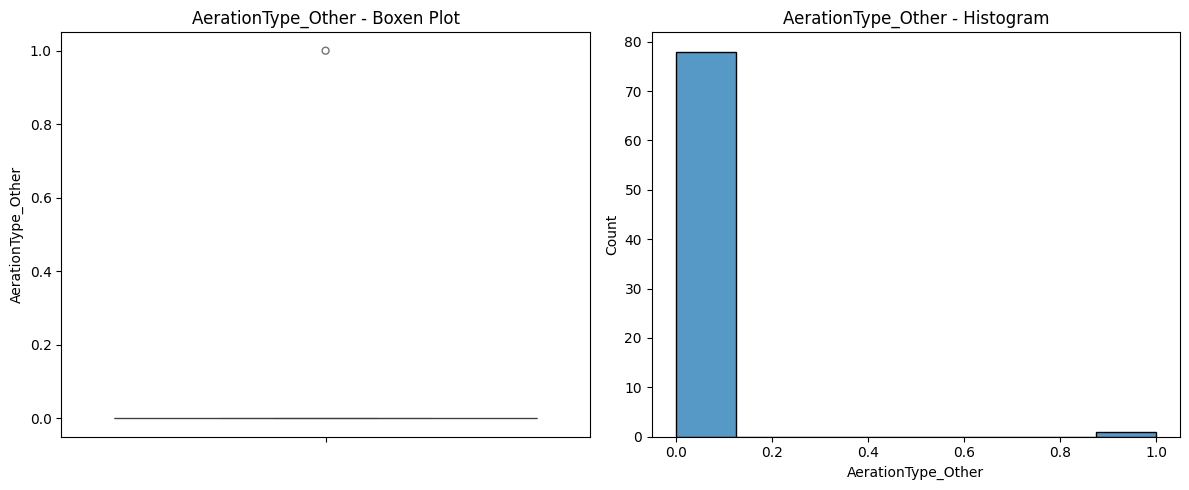

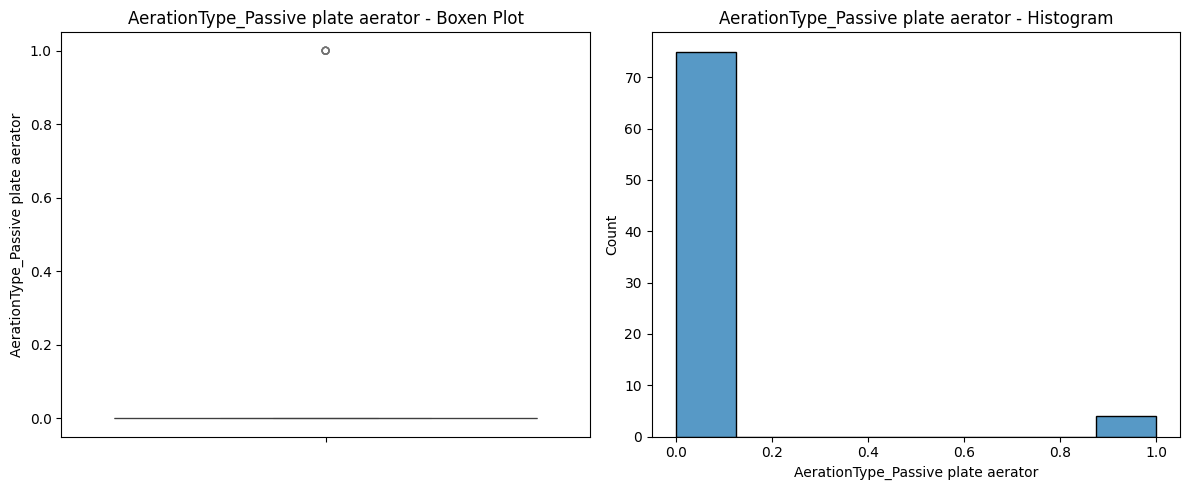

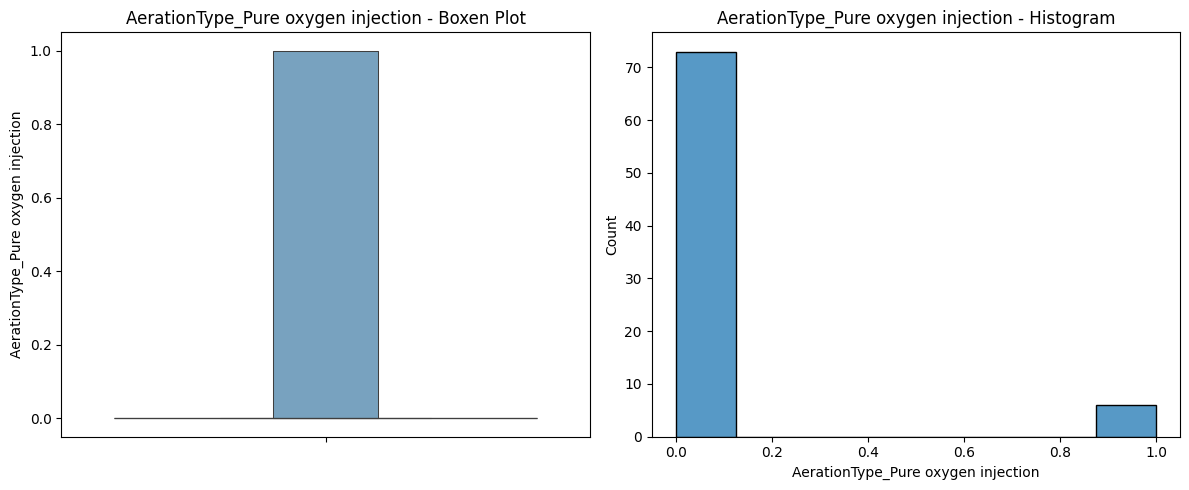

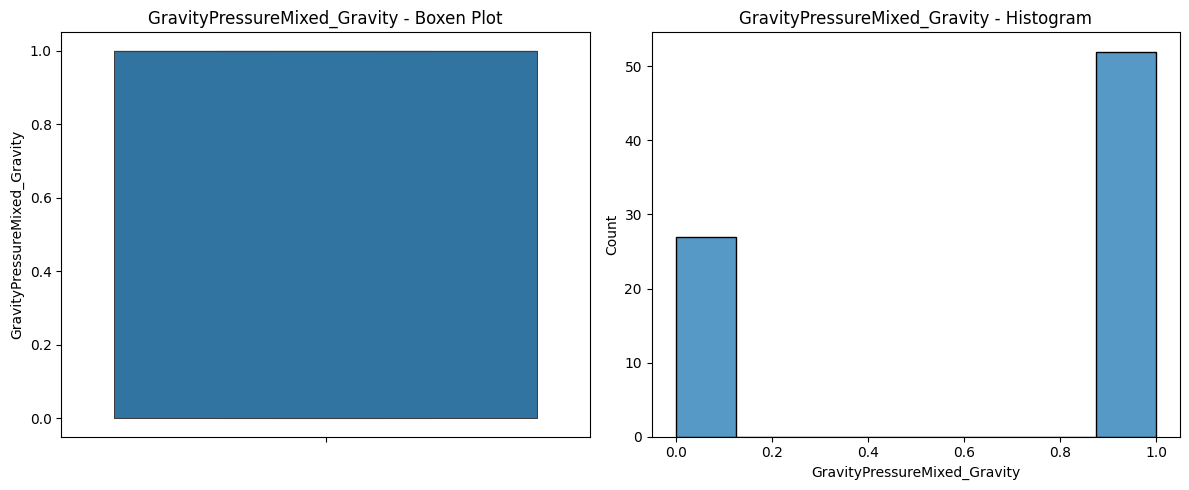

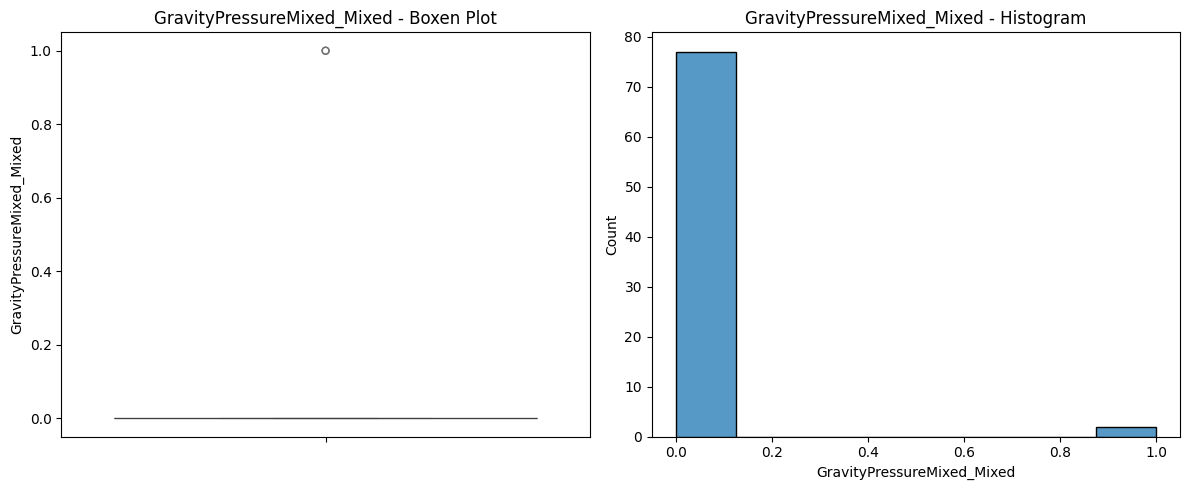

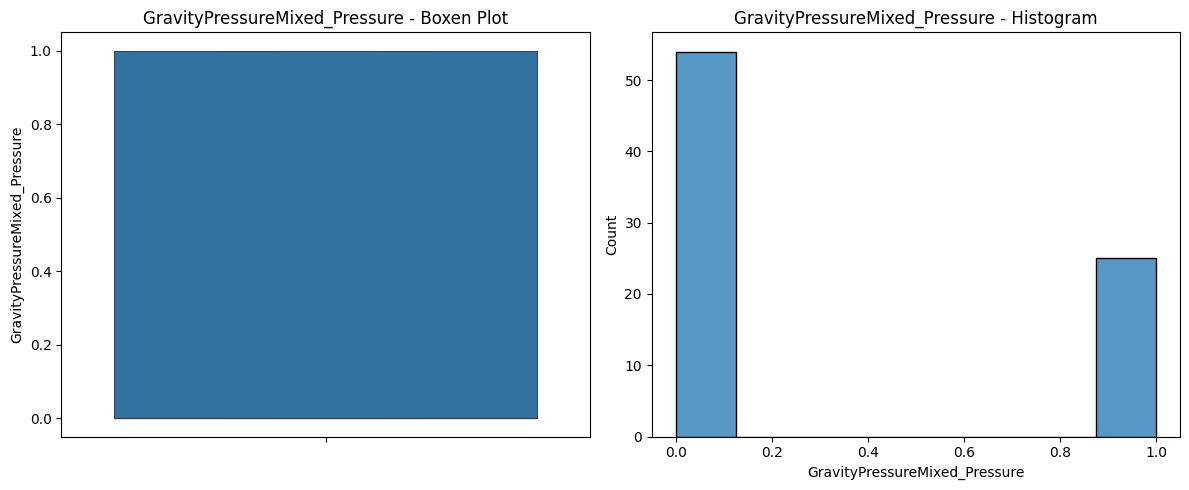

In [19]:
for column in data_cleaned.columns:
        
    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Boxen plot
    sns.boxenplot(data_cleaned[column], ax=axes[0])
    axes[0].set_title(f'{column} - Boxen Plot')
    
    # Histogram plot
    sns.histplot(data_cleaned[column], kde=False, ax=axes[1])
    axes[1].set_title(f'{column} - Histogram')
    
    plt.tight_layout()
    plt.show()

End of raw data
-----------------------------------------------------------------------------------------------------------------------------------------------------------------



### Removing Outliers

To ensure the quality of our dataset, we need to handle outliers. Outliers can significantly skew the results of our analysis and machine learning models. We will use the Interquartile Range (IQR) method to identify and remove outliers from the numerical columns.



Q1 (25th percentile) = 25

Q3 (75th percentile) = 29.5

IQR = 
𝑄
3
−
𝑄
1
=
4.5
Q3−Q1=4.5

Lower bound = 
𝑄
1
−
1.5
×
IQR
=
18.25
Q1−1.5×IQR=18.25

Upper bound = 
𝑄
3
+
1.5
×
IQR
=
36.25
Q3+1.5×IQR=36.25

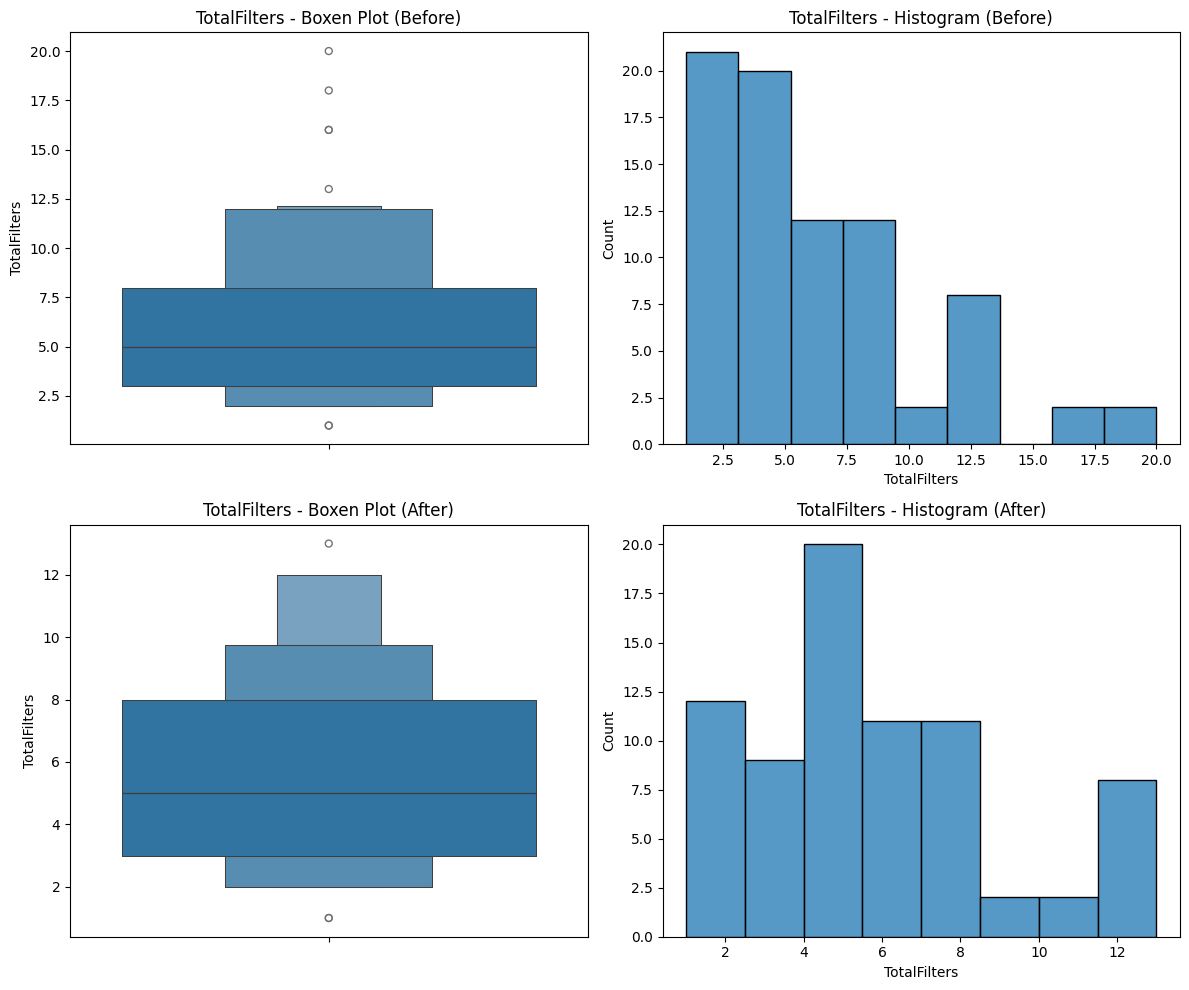

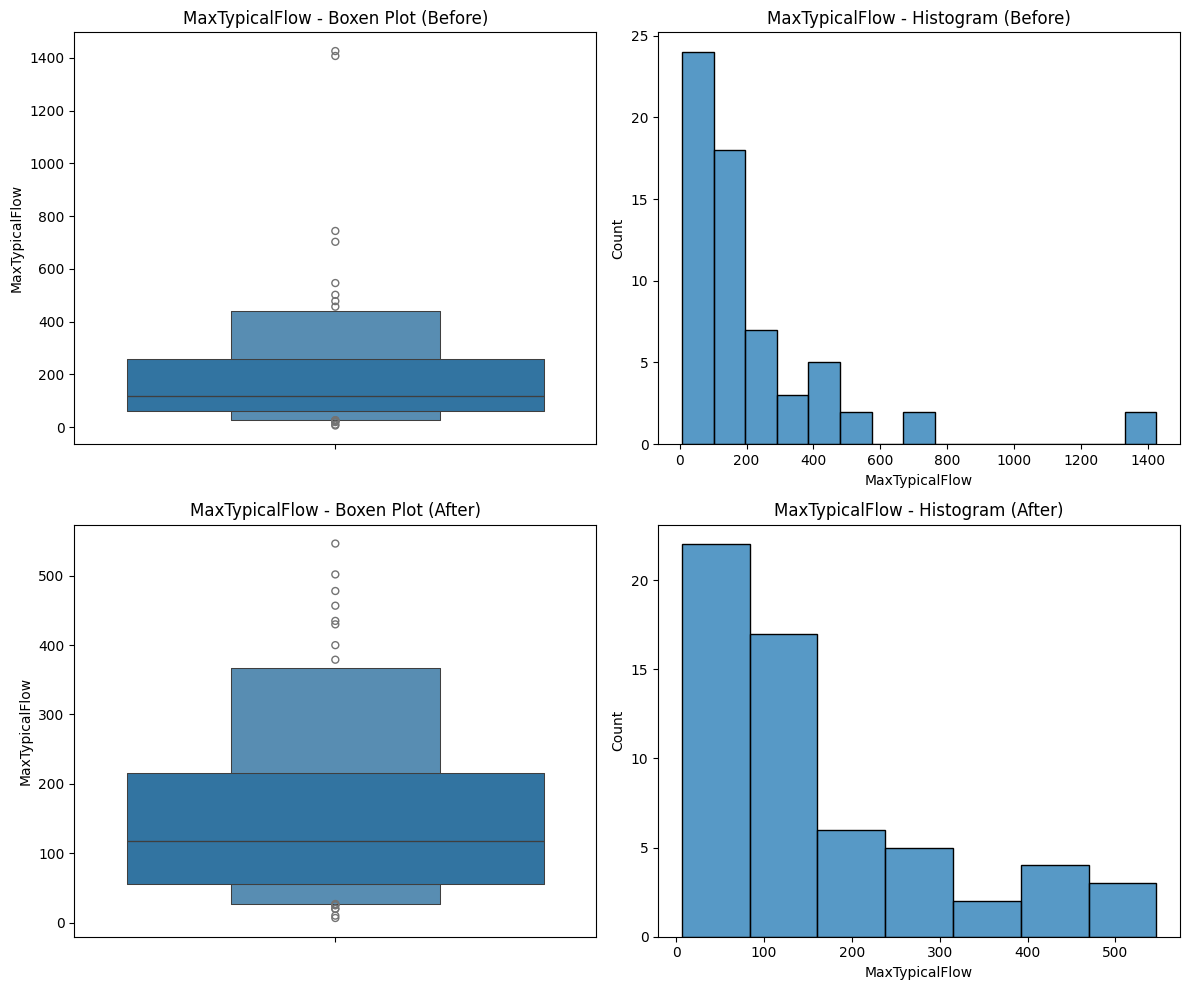

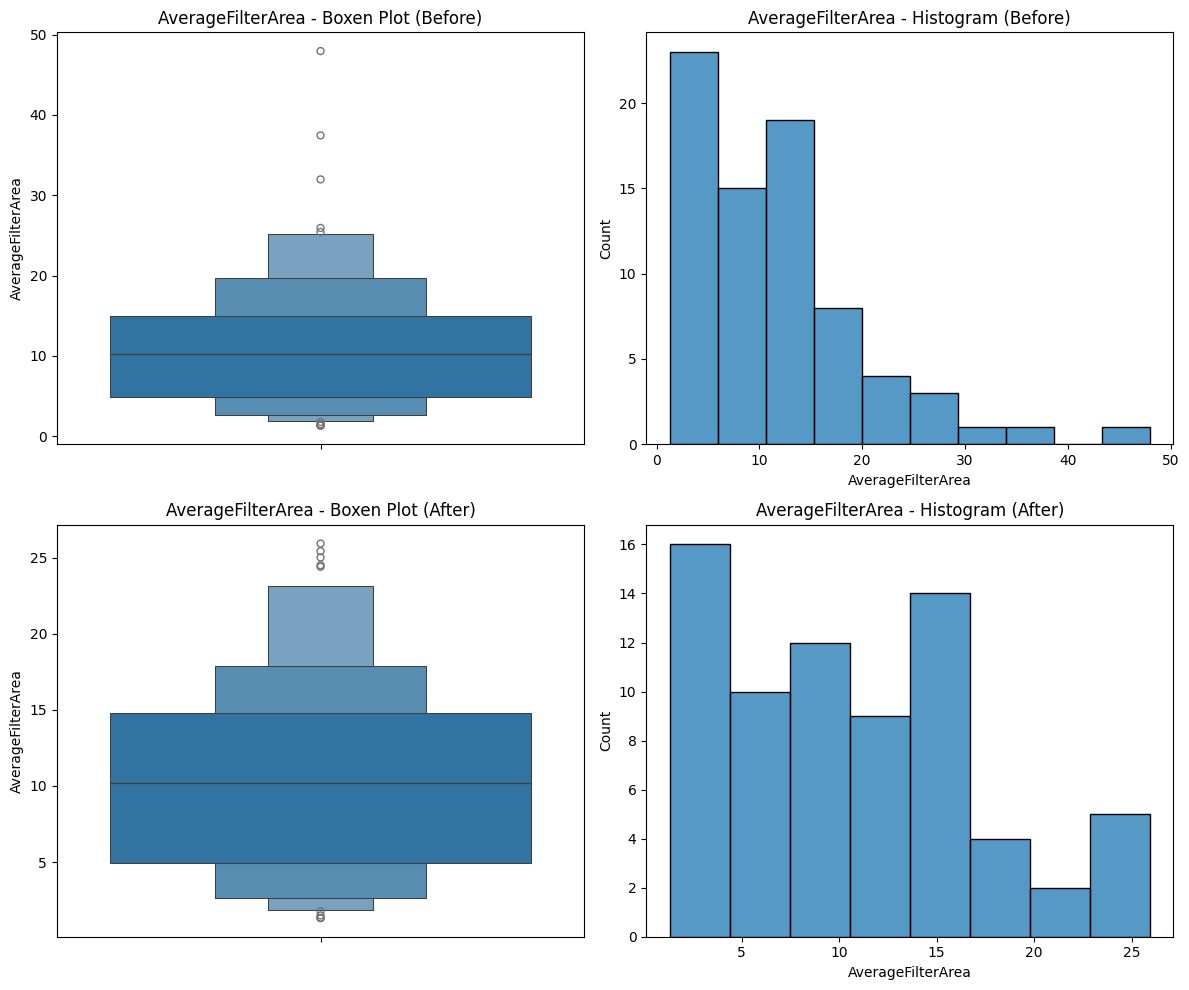

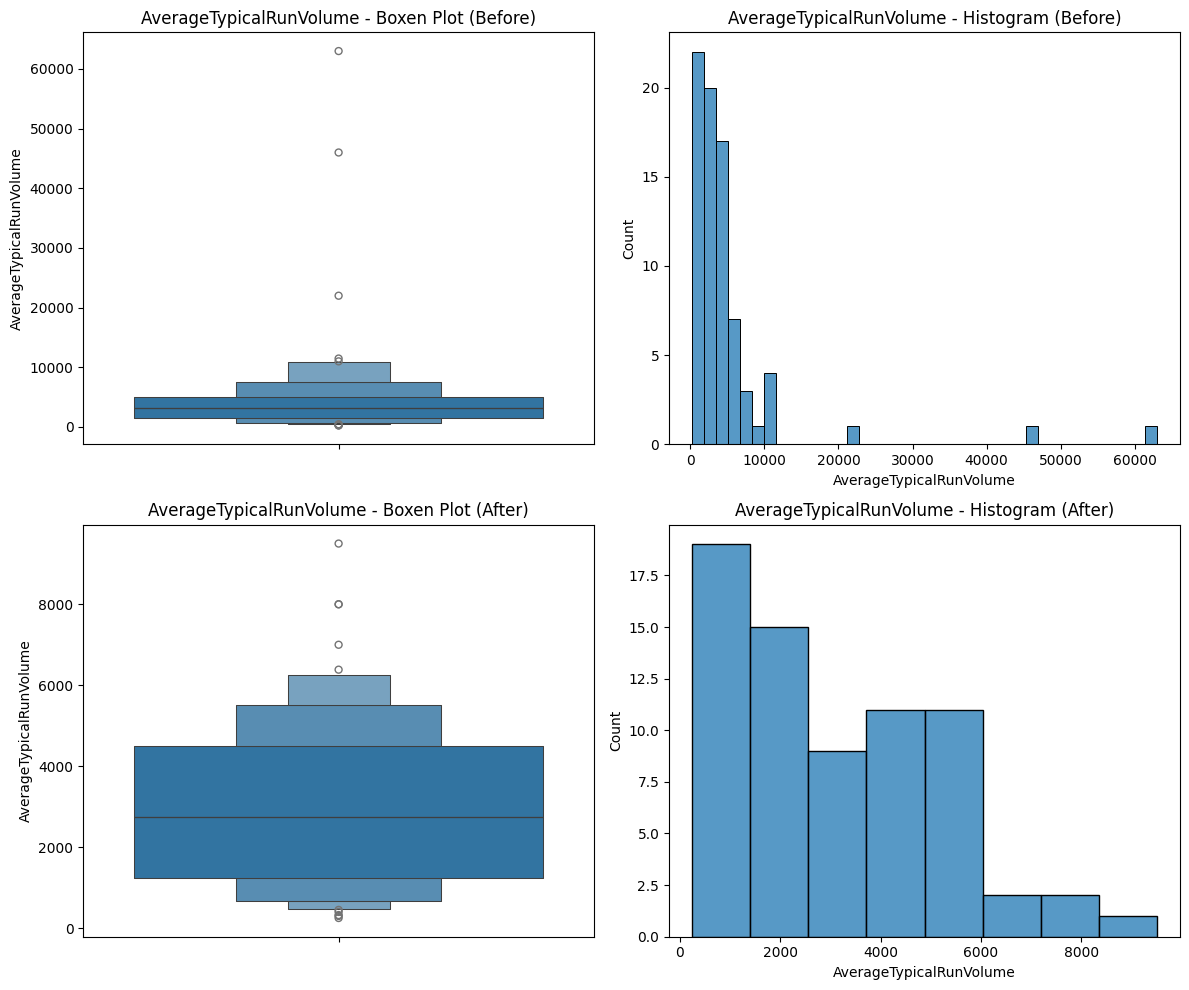

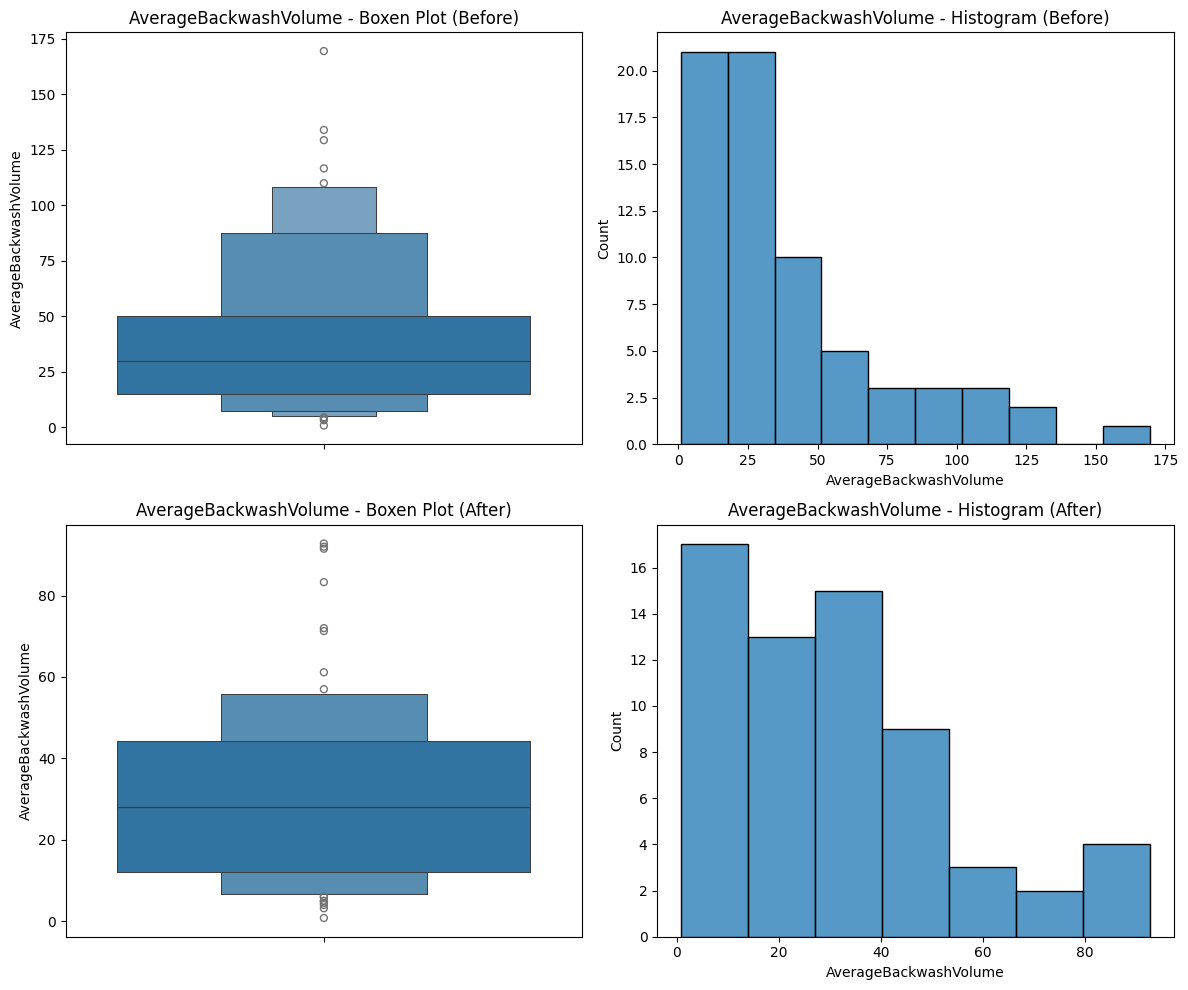

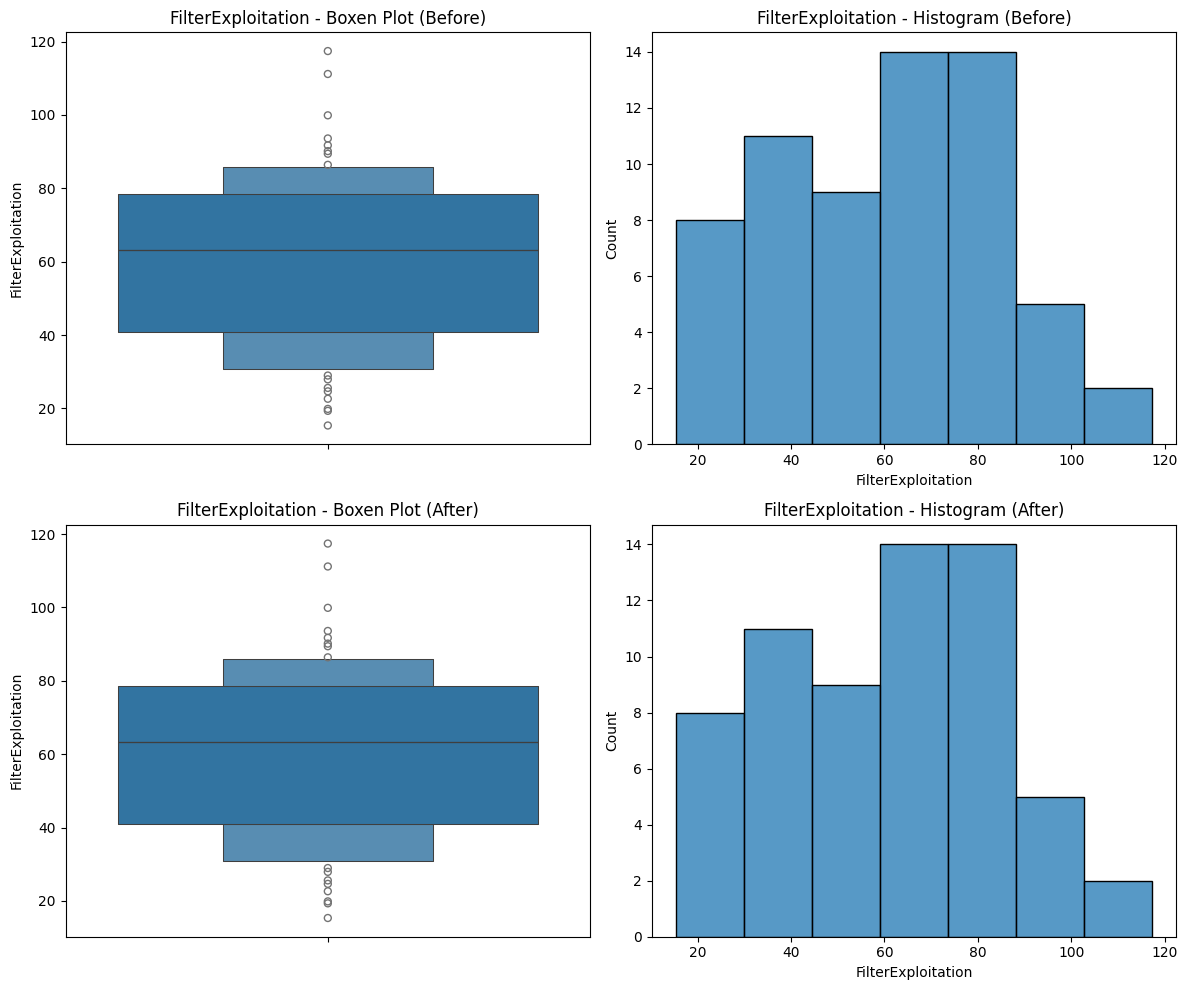

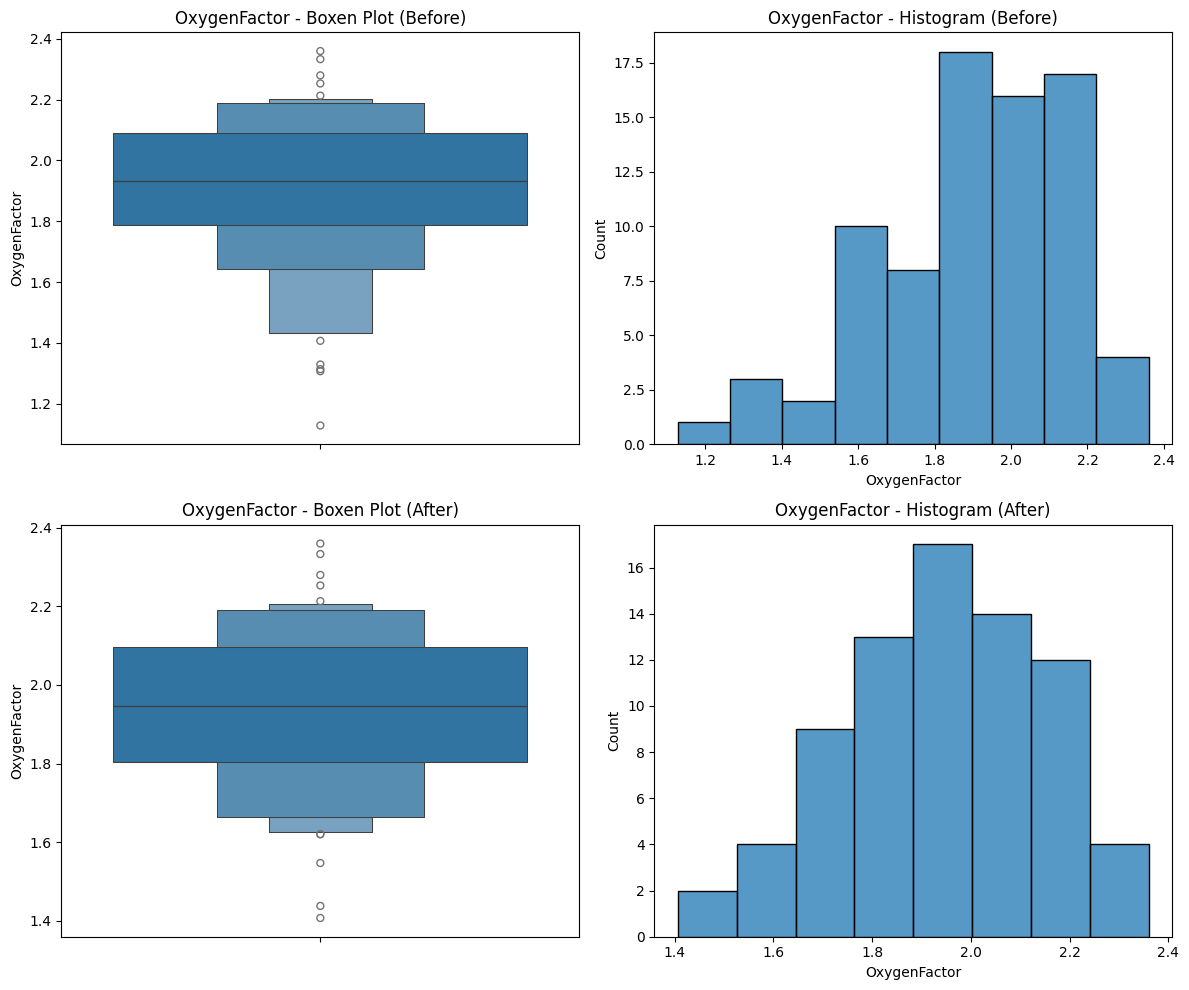

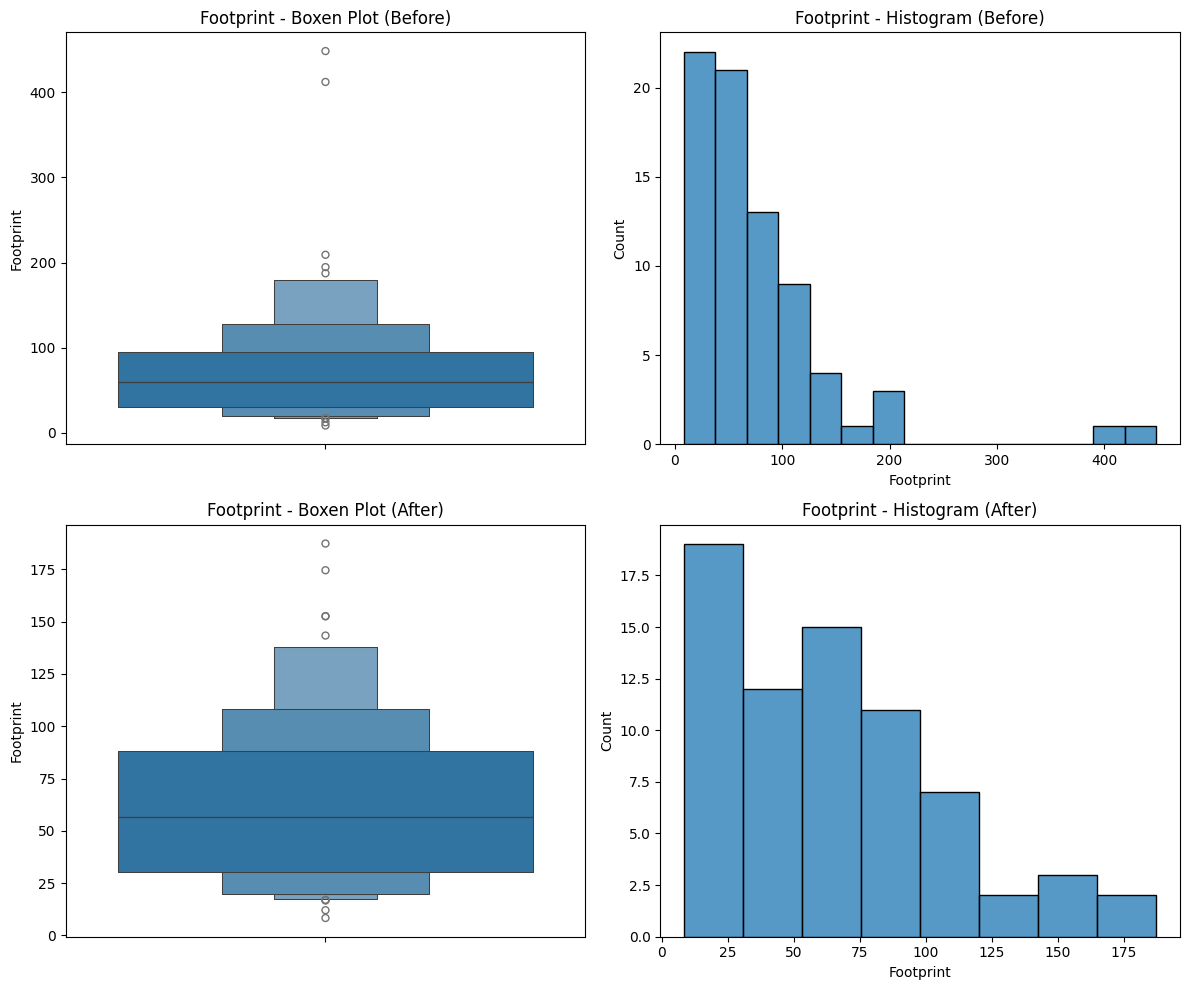

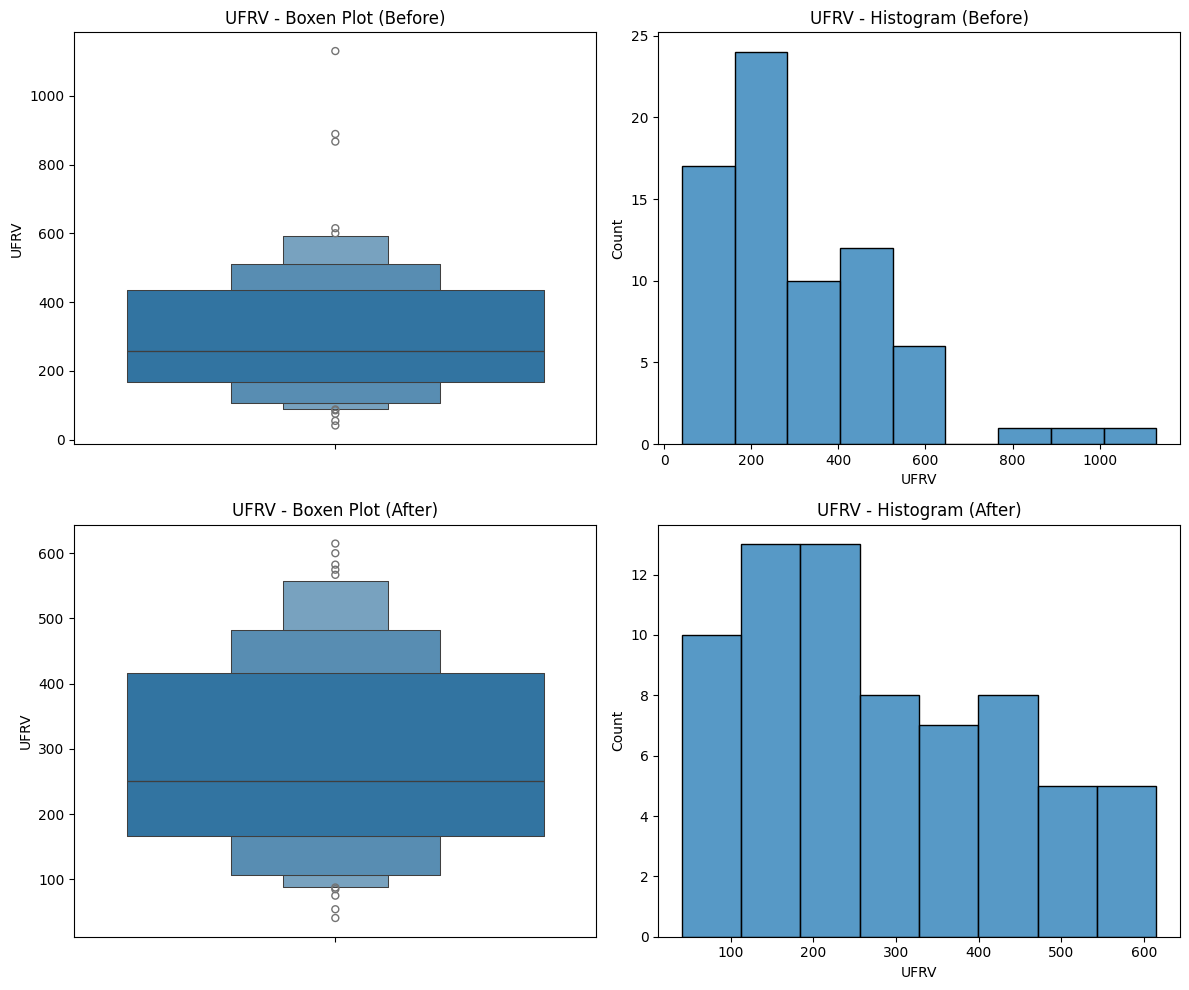

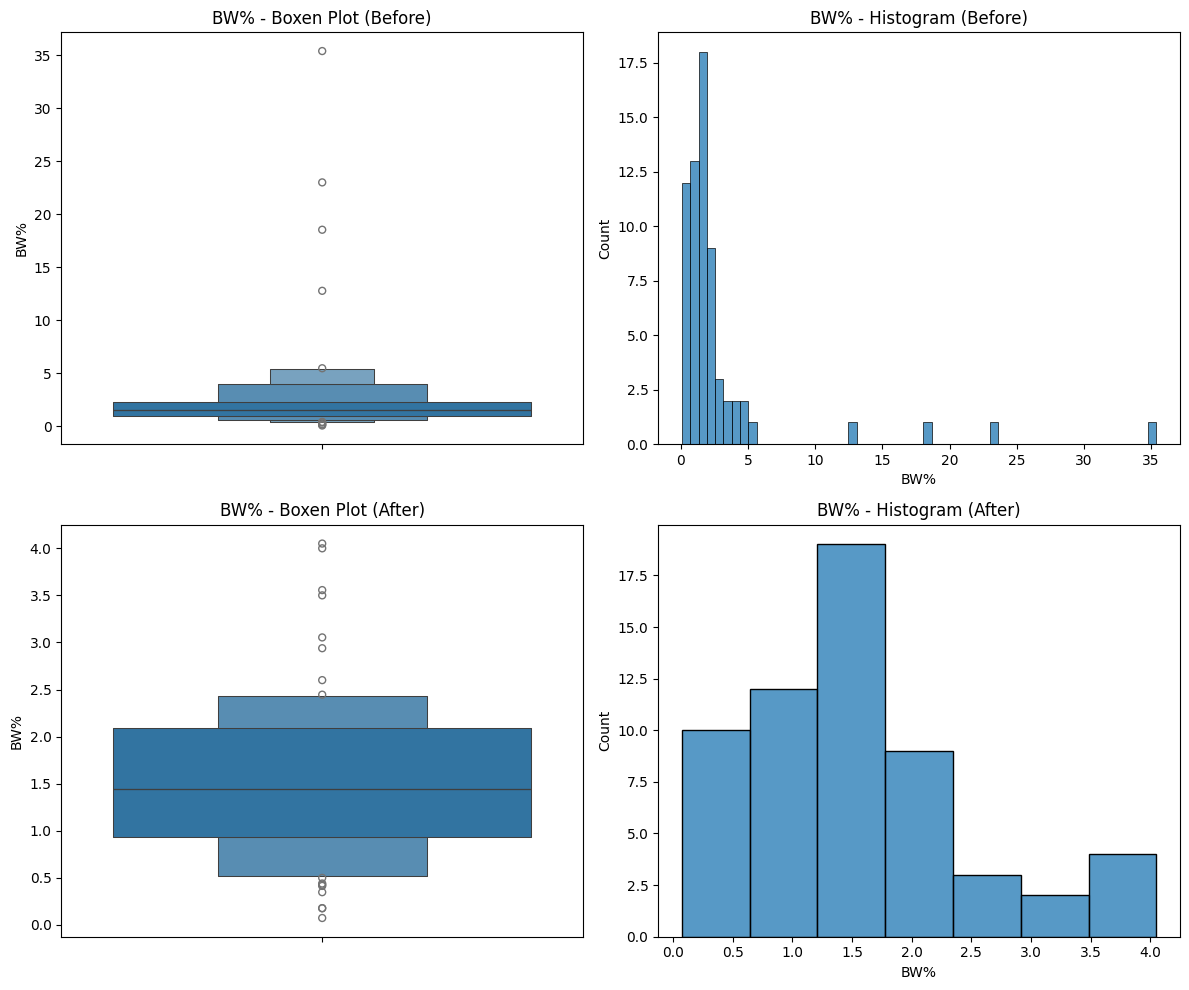

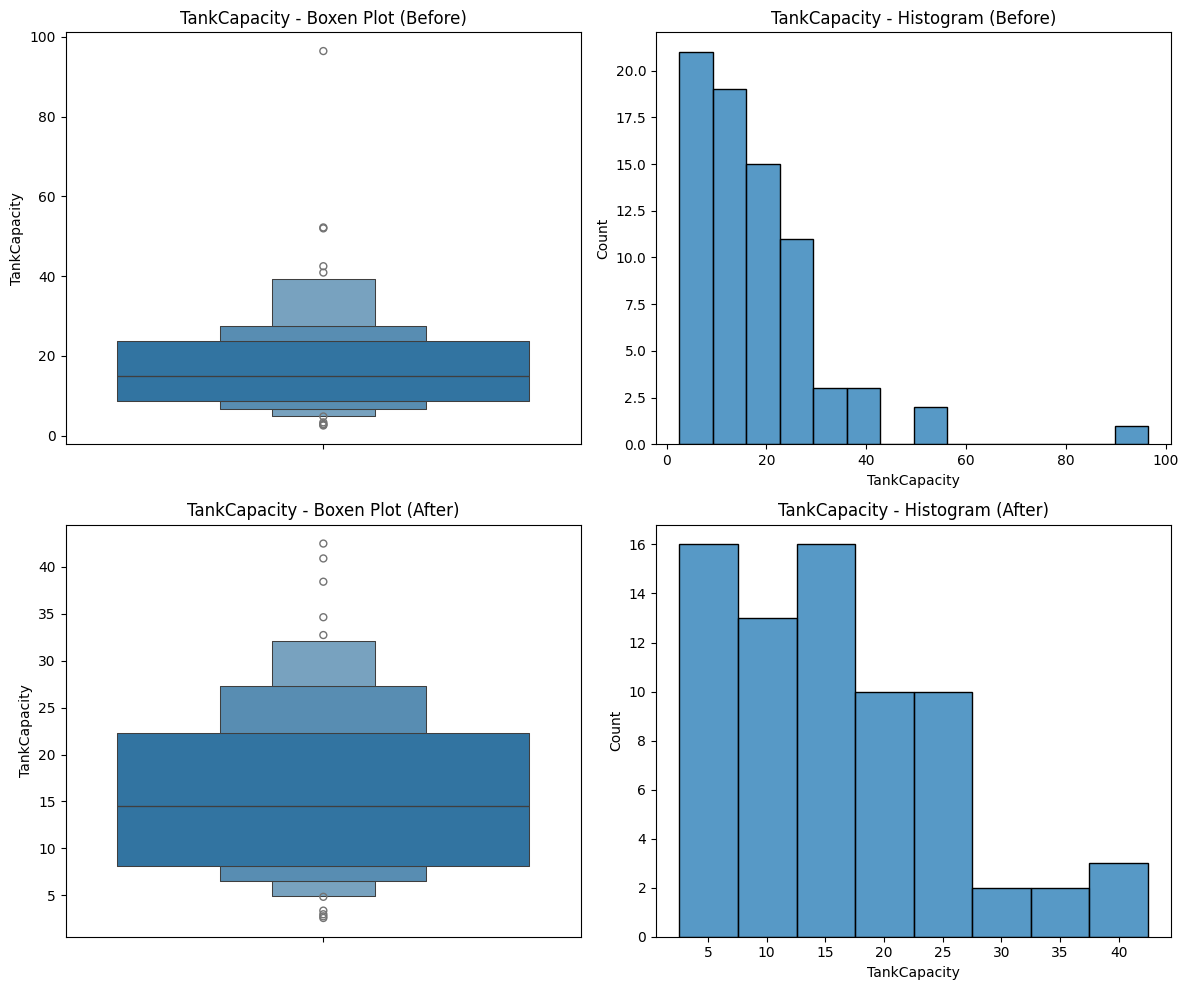

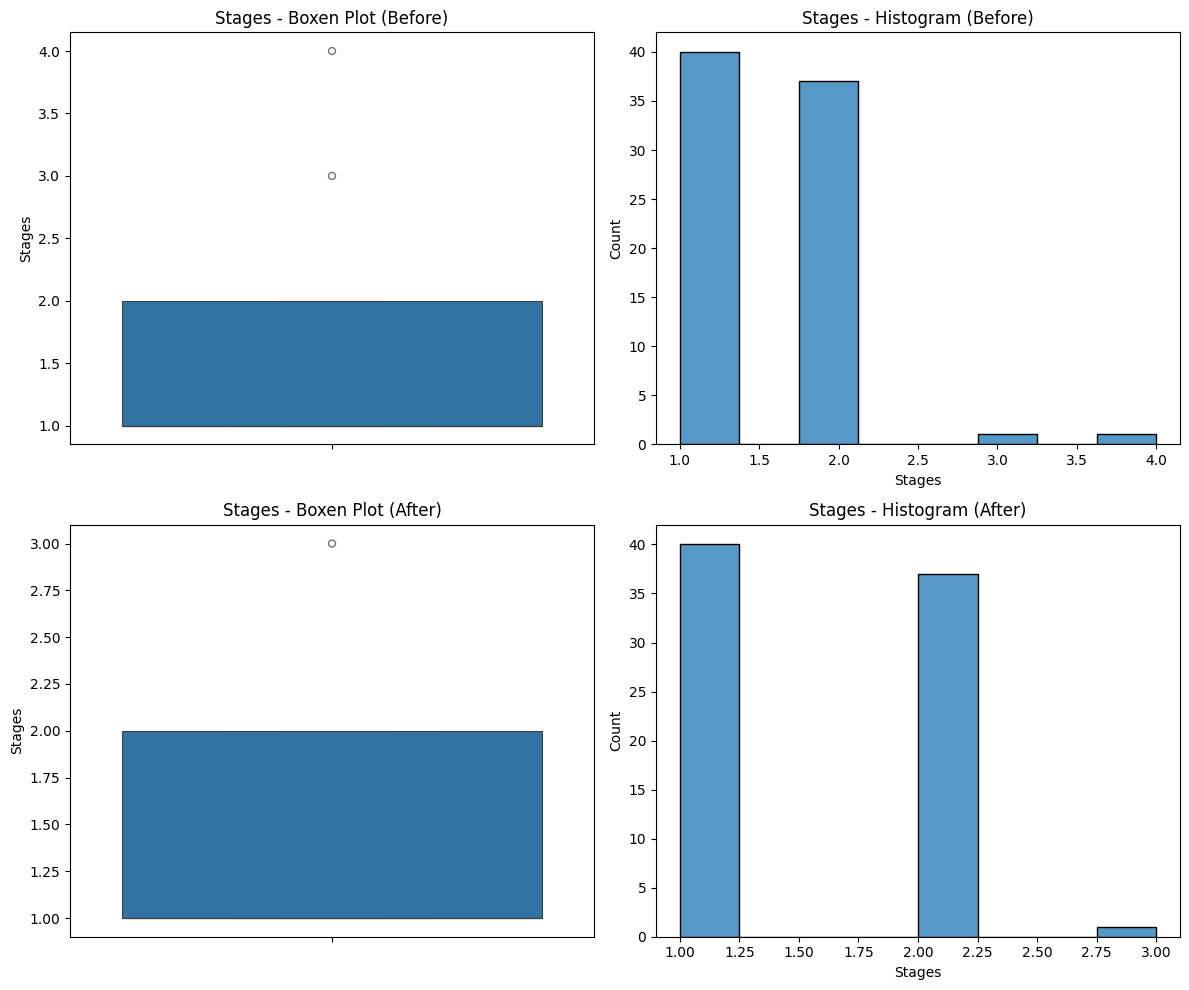

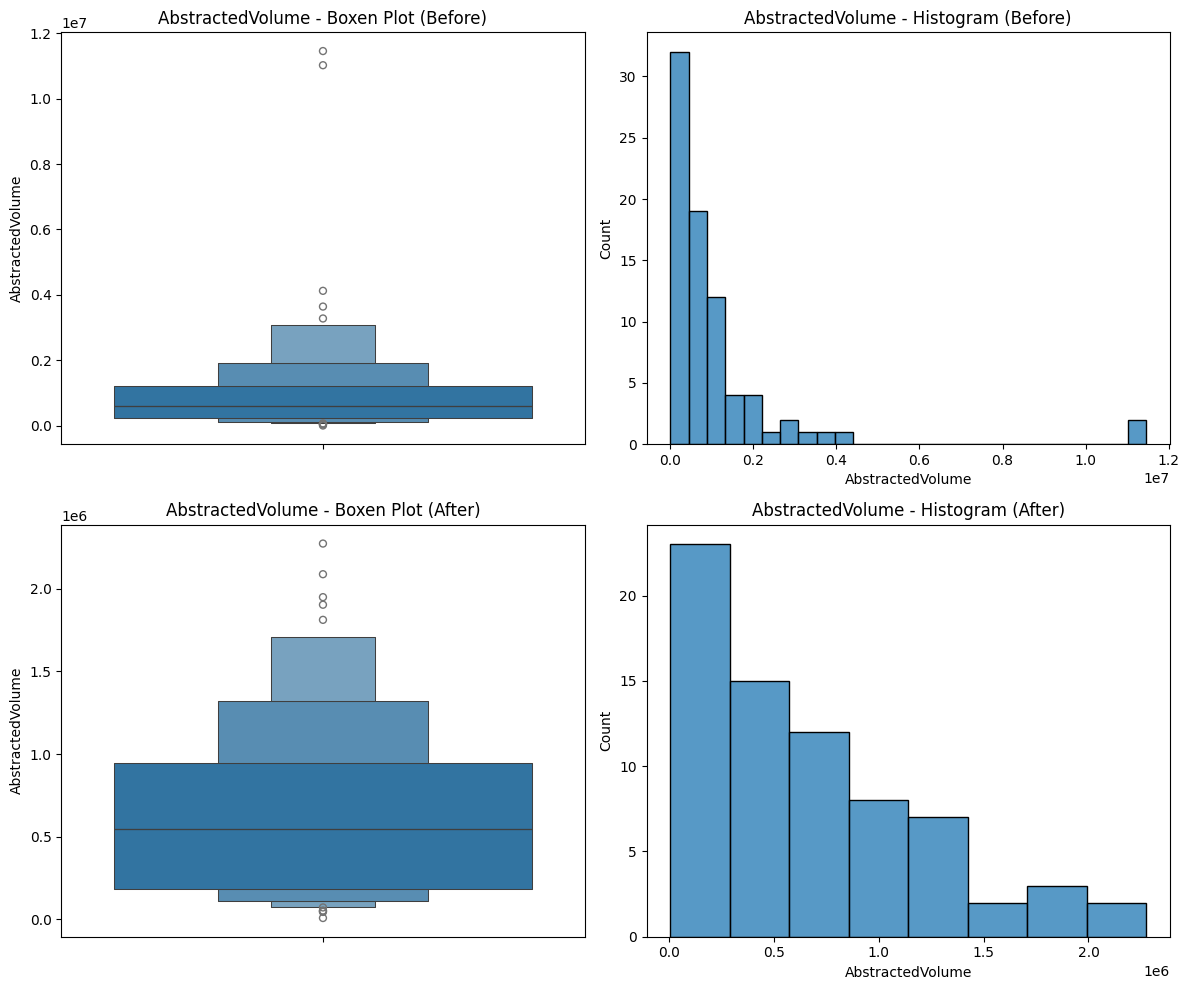

In [20]:
# Filter only numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['number']).columns

for column in numeric_columns:
    # Calculate the first quartile (Q1) of the current column, which is the 25th percentile.
    # Q1 is a point where 25% of the data points fall below this value.
    Q1 = data_cleaned[column].quantile(0.25)

    # Calculate the third quartile (Q3) of the current column, which is the 75th percentile.
    # Q3 represents a value where 75% of the data points are below it, and 25% are above it.
    Q3 = data_cleaned[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR), which is the range between Q1 and Q3.
    IQR = Q3 - Q1

    # Define the outlier thresholds as data points that fall outside 1.5 * IQR from Q1 or Q3.
    # Lower bound is Q1 - 1.5 * IQR and upper bound is Q3 + 1.5 * IQR.
    # Any values below the lower bound or above the upper bound are considered outliers.
    outlier_filter = (data_cleaned[column] < (Q1 - 1.5 * IQR)) | (data_cleaned[column] > (Q3 + 1.5 * IQR))

    # Replace the identified outliers with NaN in the current column of the dataframe.
    data_cleaned.loc[outlier_filter, column] = float("nan")



# Display the data before and after removing the outliers and filling NaNs
for column in numeric_columns:
    # Create a subplot with 2 rows and 2 columns
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Boxen plot before removing outliers
    sns.boxenplot(data_cleaned_to_compare[column], ax=axes[0, 0])
    axes[0, 0].set_title(f'{column} - Boxen Plot (Before)')
    
    # Histogram plot before removing outliers
    sns.histplot(data_cleaned_to_compare[column], kde=False, ax=axes[0, 1])
    axes[0, 1].set_title(f'{column} - Histogram (Before)')
    
    # Boxen plot after removing outliers
    sns.boxenplot(data_cleaned[column], ax=axes[1, 0])
    axes[1, 0].set_title(f'{column} - Boxen Plot (After)')
    
    # Histogram plot after removing outliers
    sns.histplot(data_cleaned[column], kde=False, ax=axes[1, 1])
    axes[1, 1].set_title(f'{column} - Histogram (After)')
    
    plt.tight_layout()
    plt.show()


In [21]:
# Adding the median, since a lot of the columns containing null were skewed.
for column in data_cleaned.select_dtypes(include=['number']).columns:
    data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)

# Re-checking if there are any missing values left
missing_after_median_imputation = data_cleaned.isnull().sum().sum()
print(f"Missing values after median imputation: {missing_after_median_imputation}")


Missing values after median imputation: 0


C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_35500\762093228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)
C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_35500\762093228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

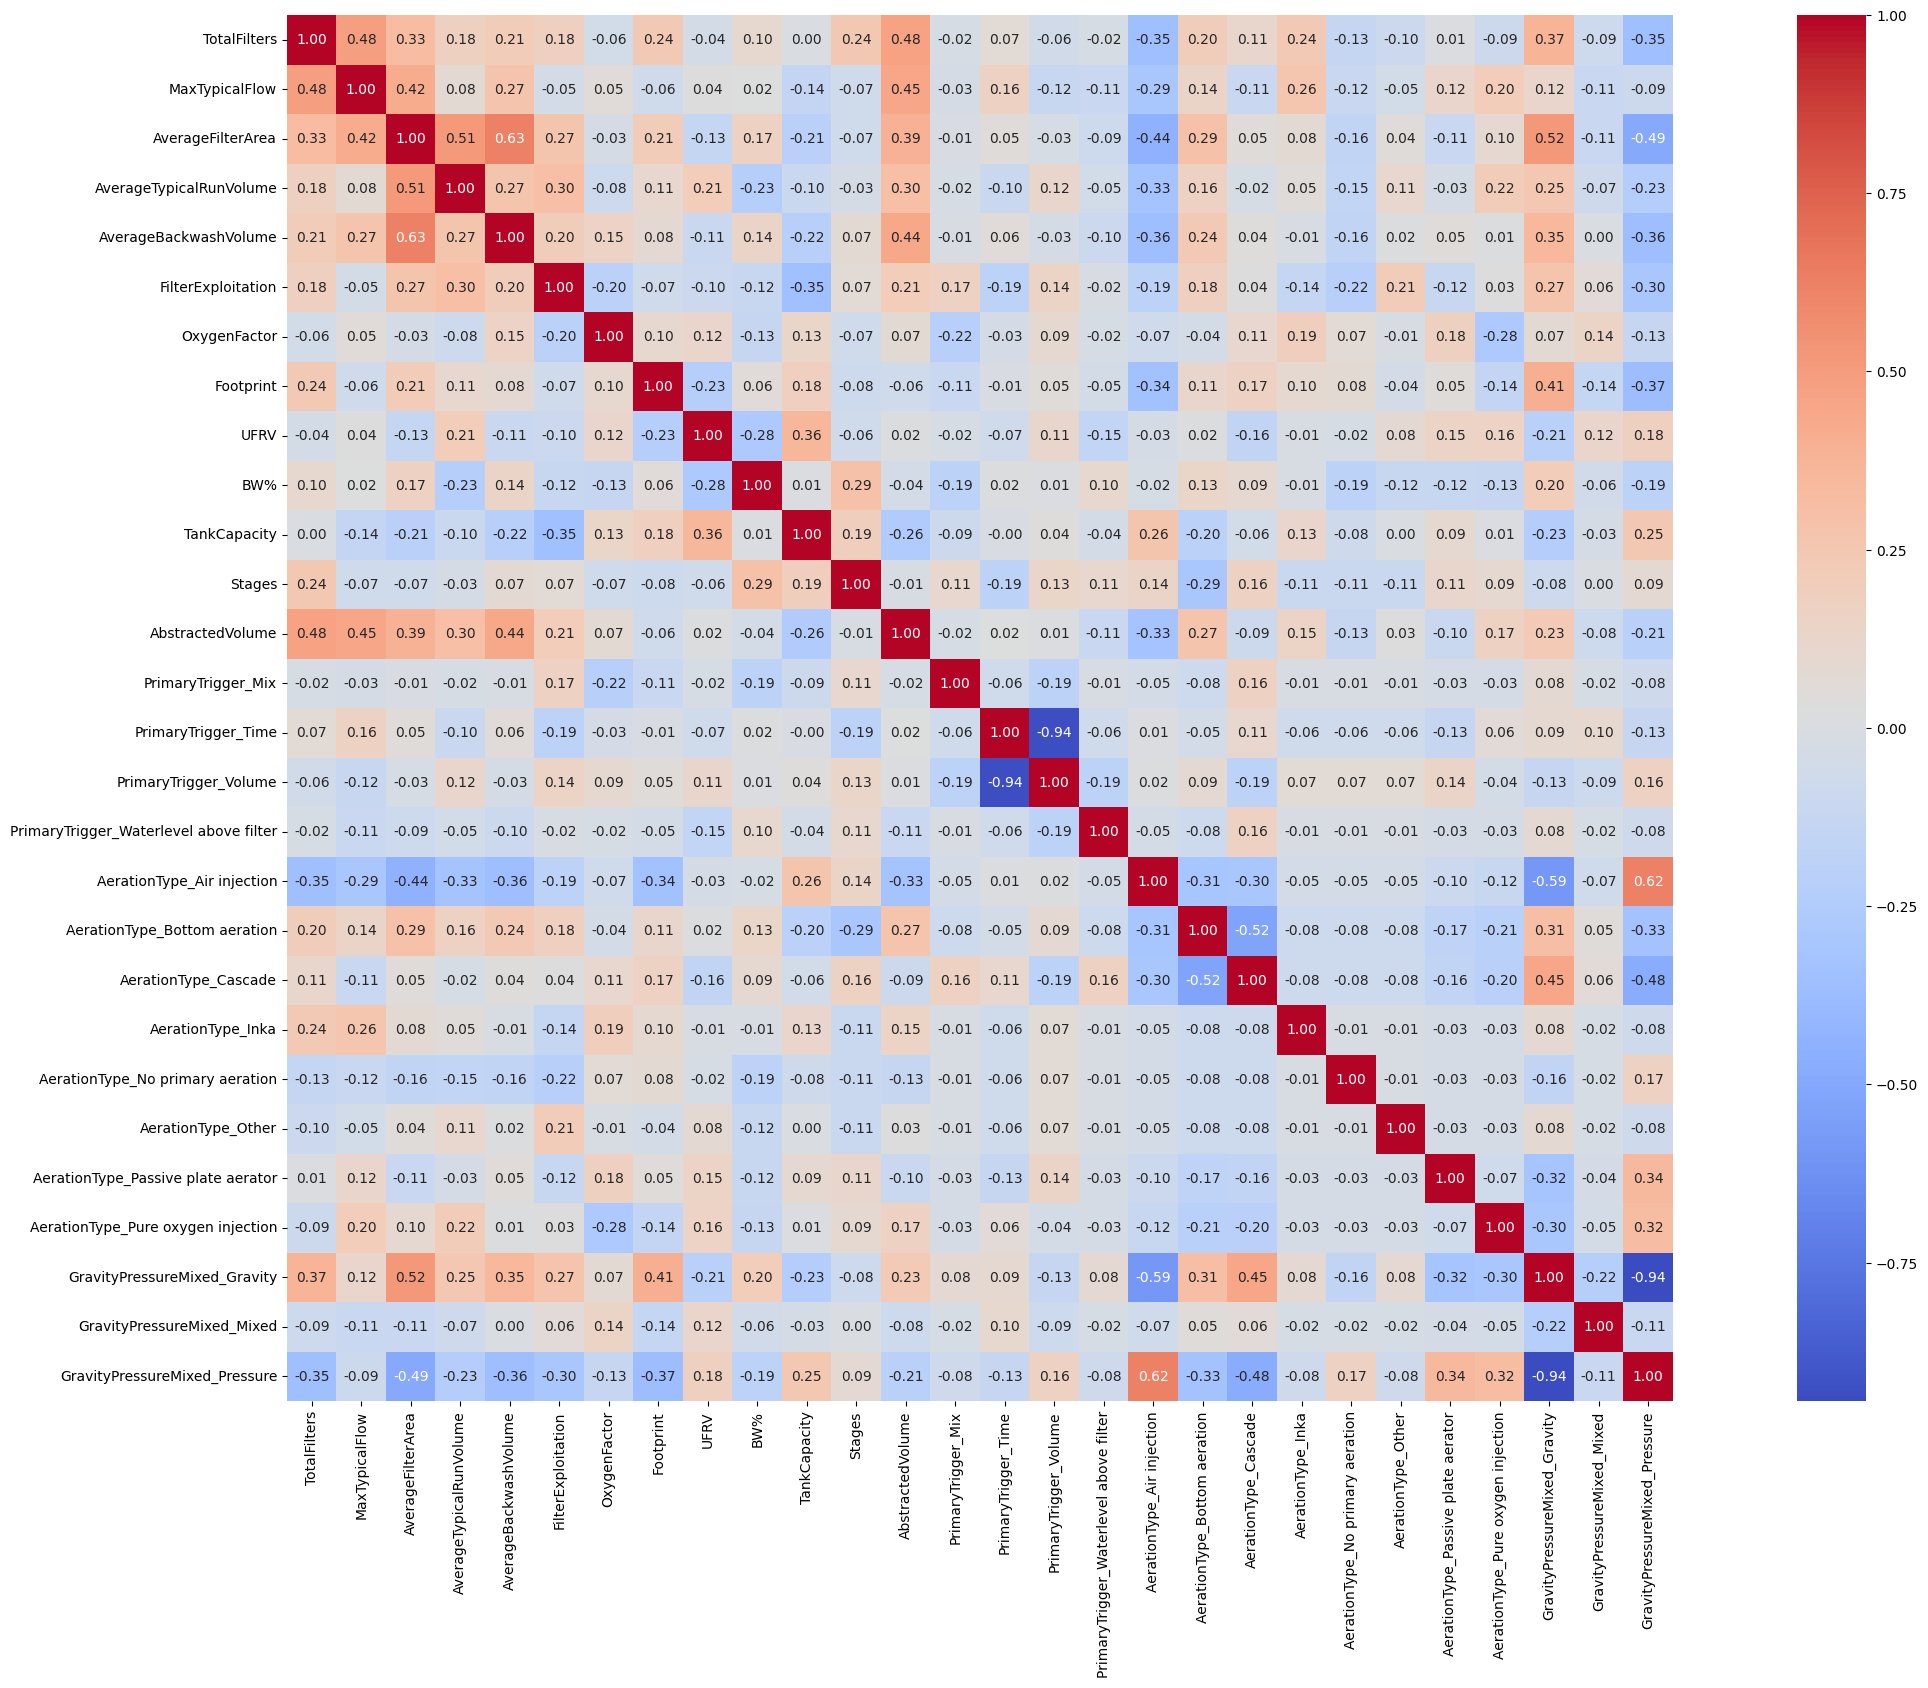

In [22]:
correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(32, 18))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.show()

In [23]:

features_to_scale = data_cleaned.select_dtypes(include=['number']).columns
scaler = StandardScaler()

# Fit and transform the the data
data_cleaned[features_to_scale] = scaler.fit_transform(data_cleaned[features_to_scale])
data_cleaned

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Footprint,UFRV,BW%,...,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,0.124532,-0.821033,-0.717843,1.079397,-0.986358,-0.146349,-0.285795,2.052261,-0.200311,-1.397255,...,False,True,False,False,False,False,False,True,False,False
1,-0.531335,-0.328435,-0.890948,-1.385563,-0.118629,0.122413,-1.560826,-1.198067,-1.660590,-0.098551,...,False,False,False,False,False,False,False,False,False,True
2,-0.531335,-0.246336,0.764369,0.375123,2.547226,0.188561,1.348859,-0.479876,-0.211559,0.853984,...,True,False,False,False,False,False,False,True,False,False
3,-1.187202,-0.261935,0.868445,-0.932816,-0.215043,0.110871,0.662304,-0.177474,-1.422486,0.822094,...,False,True,False,False,False,False,False,True,False,False
4,-1.187202,-0.261935,-1.432465,-1.410716,-1.251497,0.110871,0.041135,-0.177474,-0.781469,0.380443,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,-0.203402,-0.261935,-0.054971,-0.160126,-0.118629,1.466311,-1.920450,-1.008319,-0.200311,-1.696250,...,False,True,False,False,False,False,False,True,False,False
75,-0.203402,-0.261935,-0.054971,0.727260,1.279378,1.356946,0.956542,-1.061090,1.129076,-0.355836,...,False,False,False,False,False,True,False,False,False,True
76,0.124532,0.820959,0.670555,-0.363610,1.017613,-1.985217,-1.299281,-0.177474,-0.845297,-0.098551,...,True,False,False,False,False,False,False,True,False,False
77,2.092133,-0.261935,-0.054971,0.676955,-0.118629,0.110871,1.283472,2.287713,-1.293973,-0.098551,...,False,True,False,False,False,False,False,True,False,False


In [24]:
#Lastly we check if we have a dataset without NaN's. 
nan_counts = data_cleaned.isnull().sum()
nan_columns = nan_counts[nan_counts > 0]

print(nan_columns)



Series([], dtype: int64)
